In [1]:
%matplotlib inline
%autosave 0
%load_ext autoreload
%autoreload 2

Autosave disabled


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from crispy.Utils import Utils
from scipy.stats import ttest_ind
from dtrace.DTraceUtils import rpath
from dtrace.Associations import Association
from dtrace.TargetBenchmark import TargetBenchmark

### Import data-sets and associations

In [3]:
assoc = Association(load_associations=True, load_ppi=True)

[2019-11-20 10:59:03,242 - INFO]: #(Samples)=484
[2019-11-20 10:59:04,635 - INFO]: #(Drugs)=480; #(Genes)=16643; #(Genomic)=519; 
[2019-11-20 10:59:56,113 - INFO]: ENSP gene map: 19114
[2019-11-20 11:00:18,232 - INFO]: String: 410502
[2019-11-20 11:00:19,036 - INFO]: IGRAPH UN-- 10587 205251 -- 
+ attr: name (v), score (e)
[2019-11-20 11:00:21,157 - INFO]: IGRAPH UN-- 9595 172584 -- 
+ attr: name (v), corr (e), score (e)


In [4]:
target = TargetBenchmark(assoc=assoc, fdr=0.1)

[2019-11-20 11:05:18,669 - INFO]: Kinobeads drugs all=222
[2019-11-20 11:05:18,672 - INFO]: Kinobeads drugs overlap=64


## Drug-response and gene-essentiality associations

Top associations between drug-response and gene-essentiality

In [5]:
assoc.lmm_drug_crispr.head(15)

DRUG_ID          DRUG_NAME VERSION GeneSymbol      beta   beta_se  \
0      1510         Linsitinib   GDSC2      IGF1R  0.512906  0.047071   
1      1956          MCL1_1284   GDSC2       MCL1  0.480620  0.045163   
2      1560          Alpelisib   GDSC2     PIK3CA  0.483123  0.045847   
3      1946  MIK-665 / S-64315   GDSC2       MCL1  0.473286  0.045305   
4      2354          MCL1_8070   GDSC2       MCL1  0.472416  0.045739   
5      2127          Mcl1_6386   GDSC2       MCL1  0.461369  0.045373   
6      2235            AZD5991   GDSC2       MCL1  0.463123  0.045730   
7      1373         Dabrafenib   GDSC2       BRAF  0.448216  0.044227   
8      1497            AZD4547   GDSC1      FGFR2  0.487468  0.048213   
9      2103         Capmatinib   GDSC2        MET  0.423549  0.042444   
10     2125          Mcl1_7350   GDSC2       MCL1  0.422307  0.042379   
11     1720            AZD5991   GDSC2       MCL1  0.436832  0.045368   
12     1114          Cetuximab   GDSC1       EGFR  0.512817  0.053350   
13      185         Linsitinib   GDSC1      IGF1R  0.517238  0.055027   
14     1168          Erlotinib   GDSC2       EGFR  0.460070  0.050456   

            pval  samples  ncovariates           fdr       DRUG_TARGETS  \
0   2.346188e-32      409            6  3.904760e-28         INSR;IGF1R   
1   6.733158e-31      393            6  1.120600e-26               MCL1   
2   4.970543e-30      408            6  8.272474e-26             PIK3CA   
3   1.212444e-29      393            6  2.017870e-25               MCL1   
4   5.624616e-29      387            6  9.361048e-25               MCL1   
5   5.897636e-28      390            6  9.815436e-24               MCL1   
6   1.072208e-27      391            6  1.784475e-23               MCL1   
7   1.075448e-27      395            6  1.789867e-23               BRAF   
8   4.172631e-27      442            6  6.944510e-23  FGFR2;FGFR3;FGFR1   
9   8.134040e-27      391            6  1.353748e-22                MET   
10  1.008564e-26      392            6  1.678554e-22               MCL1   
11  5.994630e-25      377            6  9.976863e-21               MCL1   
12  2.033207e-24      431            6  3.383867e-20               EGFR   
13  3.049459e-23      440            6  5.075214e-19         INSR;IGF1R   
14  4.241914e-22      393            6  7.059817e-18               EGFR   

   target_detailed target x_dtype  
0                T      T  crispr  
1                T      T  crispr  
2                T      T  crispr  
3                T      T  crispr  
4                T      T  crispr  
5                T      T  crispr  
6                T      T  crispr  
7                T      T  crispr  
8                T      T  crispr  
9                T      T  crispr  
10               T      T  crispr  
11               T      T  crispr  
12               T      T  crispr  
13               T      T  crispr  
14               T      T  crispr

Top associations between drug-response and gene-expression

In [6]:
assoc.lmm_drug_gexp.head(15)

DRUG_ID             DRUG_NAME VERSION GeneSymbol      beta   beta_se  \
0      2013            CDK12_8969   GDSC2      ABCB1  0.554093  0.052515   
1      1026          Tanespimycin   GDSC1       NQO1 -0.593396  0.074053   
2      1003          Camptothecin   GDSC2     SLFN11 -0.343808  0.043474   
3      1190           Gemcitabine   GDSC2     SLFN11 -0.369194  0.047628   
4      1047         Nutlin-3a (-)   GDSC2     RPS27L -0.375425  0.049339   
5      1047         Nutlin-3a (-)   GDSC2       MDM2 -0.298926  0.039731   
6      2282            Romidepsin   GDSC2      ABCB1  0.462811  0.061166   
7      1411            EGFRM_5104   GDSC1      MIEN1 -0.359579  0.048136   
8      1047         Nutlin-3a (-)   GDSC2     CDKN1A -0.323483  0.044313   
9      1047         Nutlin-3a (-)   GDSC2     PTCHD4 -0.294099  0.040813   
10     1558             Lapatinib   GDSC2      MIEN1 -0.340943  0.046329   
11     1410               AZD9291   GDSC1      MIEN1 -0.361810  0.048921   
12     1047         Nutlin-3a (-)   GDSC2       DDB2 -0.297394  0.041522   
13     1941  Sepantronium bromide   GDSC2    SLC35F2 -0.435146  0.059280   
14     1558             Lapatinib   GDSC2     STARD3 -0.322112  0.044451   

            pval  samples  ncovariates           fdr             DRUG_TARGETS  \
0   2.942216e-31      336            6  4.521598e-27                    CDK12   
1   4.108725e-17      360            6  6.314288e-13        HSP90AA1;HSP90AB1   
2   1.123684e-16      358            6  1.726878e-12                     TOP1   
3   4.291046e-16      341            6  6.594480e-12                      NaN   
4   1.689565e-15      344            6  2.596524e-11                     MDM2   
5   3.709942e-15      344            6  2.850719e-11                     MDM2   
6   2.350294e-15      337            6  3.611932e-11  HDAC2;HDAC8;HDAC3;HDAC1   
7   9.185884e-15      403            6  1.411687e-10                     EGFR   
8   2.759989e-14      344            6  1.413850e-10                     MDM2   
9   6.249823e-14      344            6  2.401182e-10                     MDM2   
10  1.596233e-14      341            6  2.453090e-10               EGFR;ERBB2   
11  1.740704e-14      401            6  2.675114e-10                     EGFR   
12  9.096668e-14      344            6  2.795952e-10                     MDM2   
13  1.838858e-14      338            6  2.825957e-10                    BIRC5   
14  4.304253e-14      341            6  3.307388e-10               EGFR;ERBB2   

                        target_detailed target x_dtype  
0                                     2      2    gexp  
1                                     3      3    gexp  
2          No link; Gene not in network      -    gexp  
3   No link; No drug target information      -    gexp  
4                                     2      2    gexp  
5                                     T      T    gexp  
6                                     2      2    gexp  
7          No link; Gene not in network      -    gexp  
8                                     1      1    gexp  
9          No link; Gene not in network      -    gexp  
10         No link; Gene not in network      -    gexp  
11         No link; Gene not in network      -    gexp  
12                                    2      2    gexp  
13         No link; Gene not in network      -    gexp  
14         No link; Gene not in network      -    gexp

Volcano plot of the significant associations.

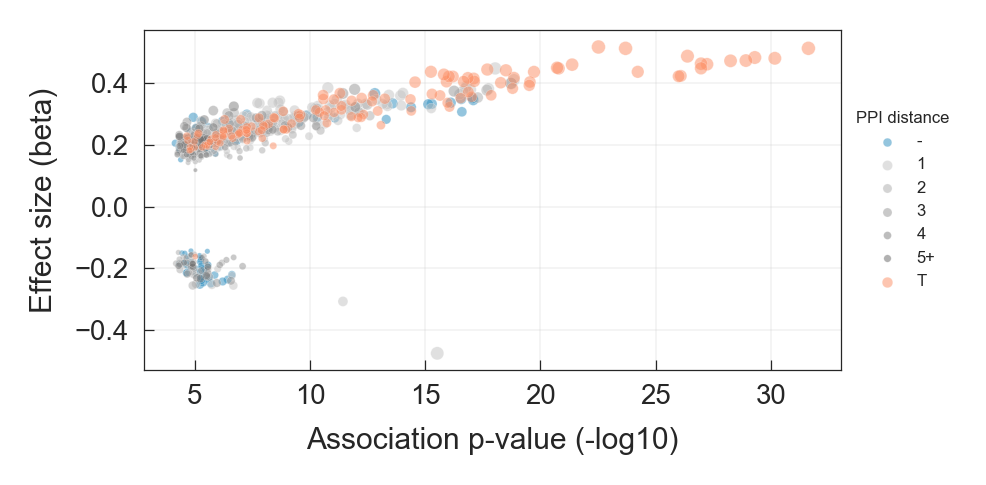

In [7]:
plt.figure(figsize=(3, 1.5), dpi=300)
target.signif_volcano()
plt.savefig(
    f"{rpath}/target_benchmark_volcano.pdf", bbox_inches="tight", transparent=True
)
plt.show()

Top 50 most strongly correlated drugs

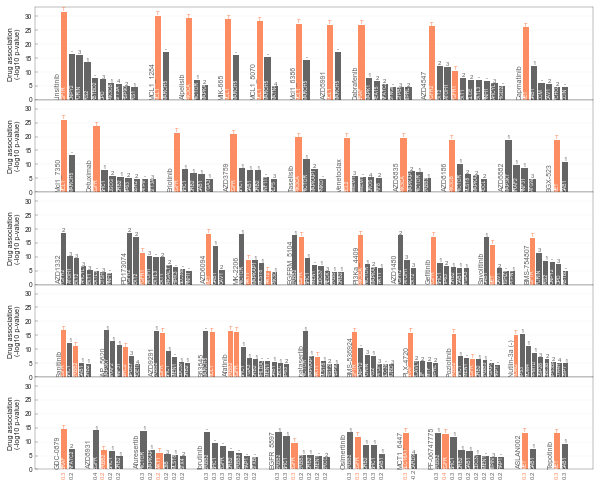

In [8]:
target.top_associations_barplot()
plt.savefig(
    f"{rpath}/target_benchmark_associations_barplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Representative examples of the drug-gene associations.

In [9]:
dgs = [
    ("Alpelisib", "PIK3CA"),
    ("Nutlin-3a (-)", "MDM2"),
    ("MCL1_1284", "MCL1"),
    ("MCL1_1284", "MARCH5"),
    ("Venetoclax", "BCL2"),
    ("Volasertib", "PLK1"),
    ("Rigosertib", "PLK1"),
    ("Linsitinib", "CNPY2"),
    ("Cetuximab", "EGFR"),
    ("Olaparib", "PARP1"),
    ("Olaparib", "PARP2"),
]

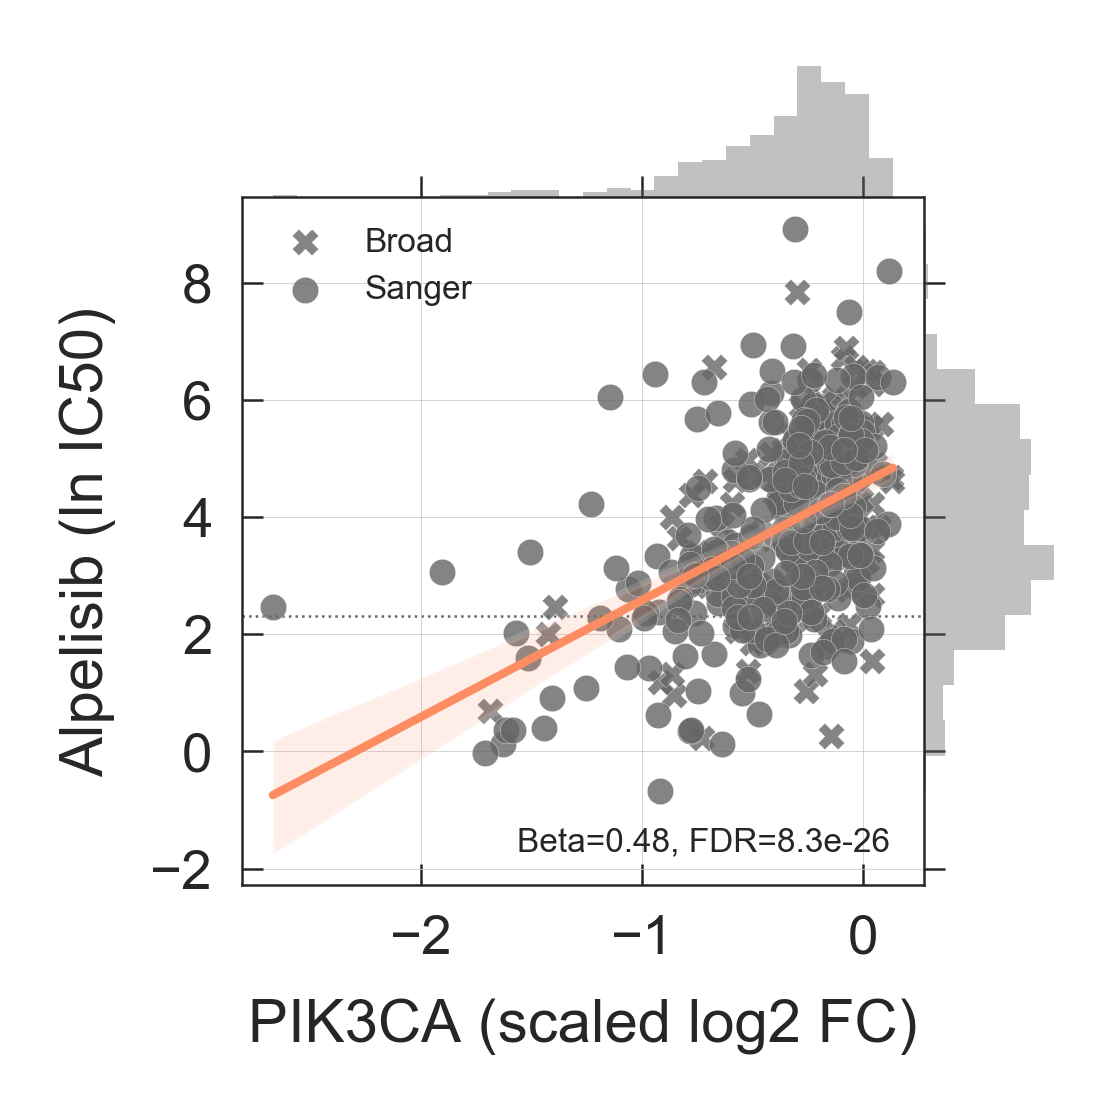

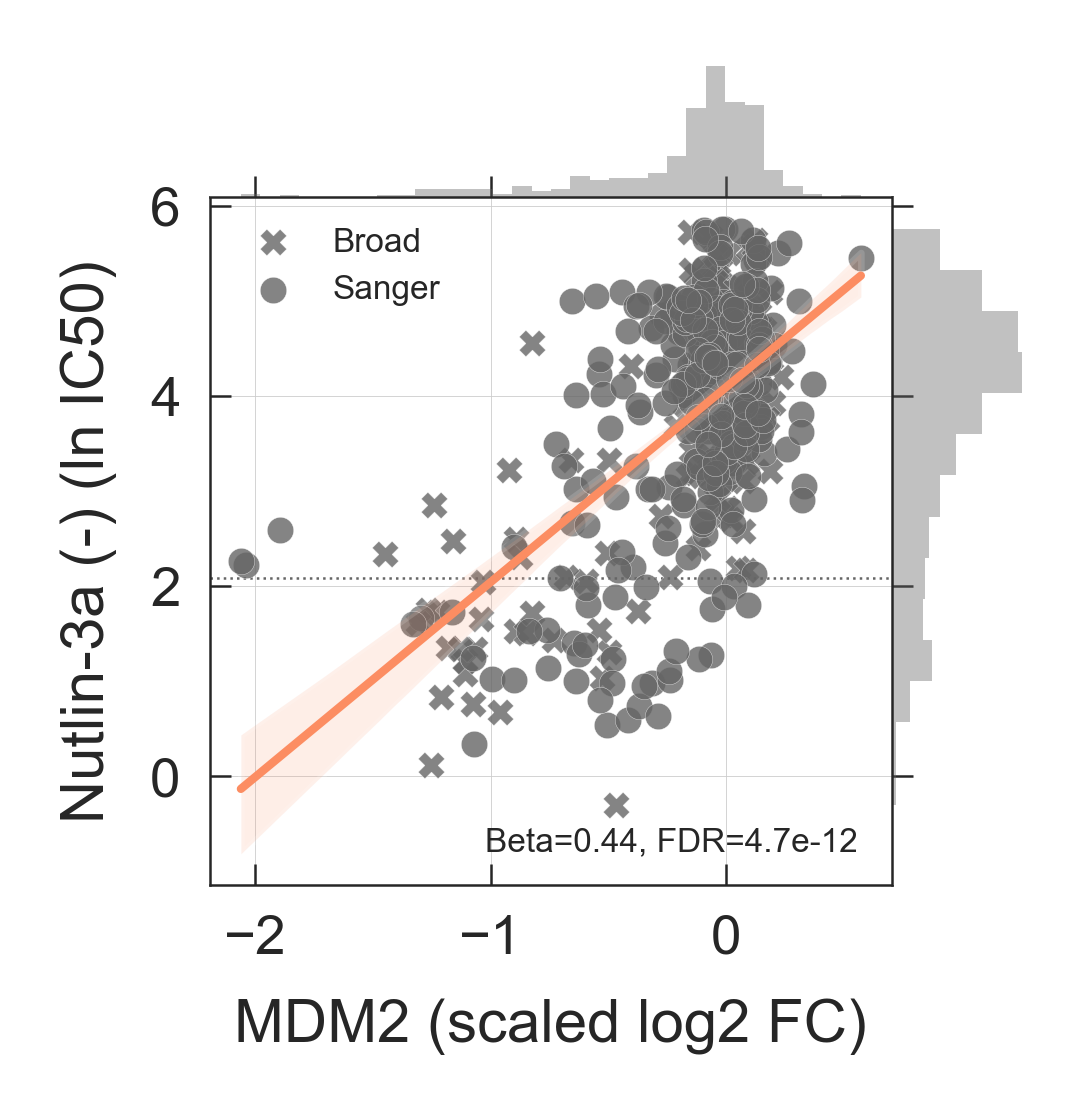

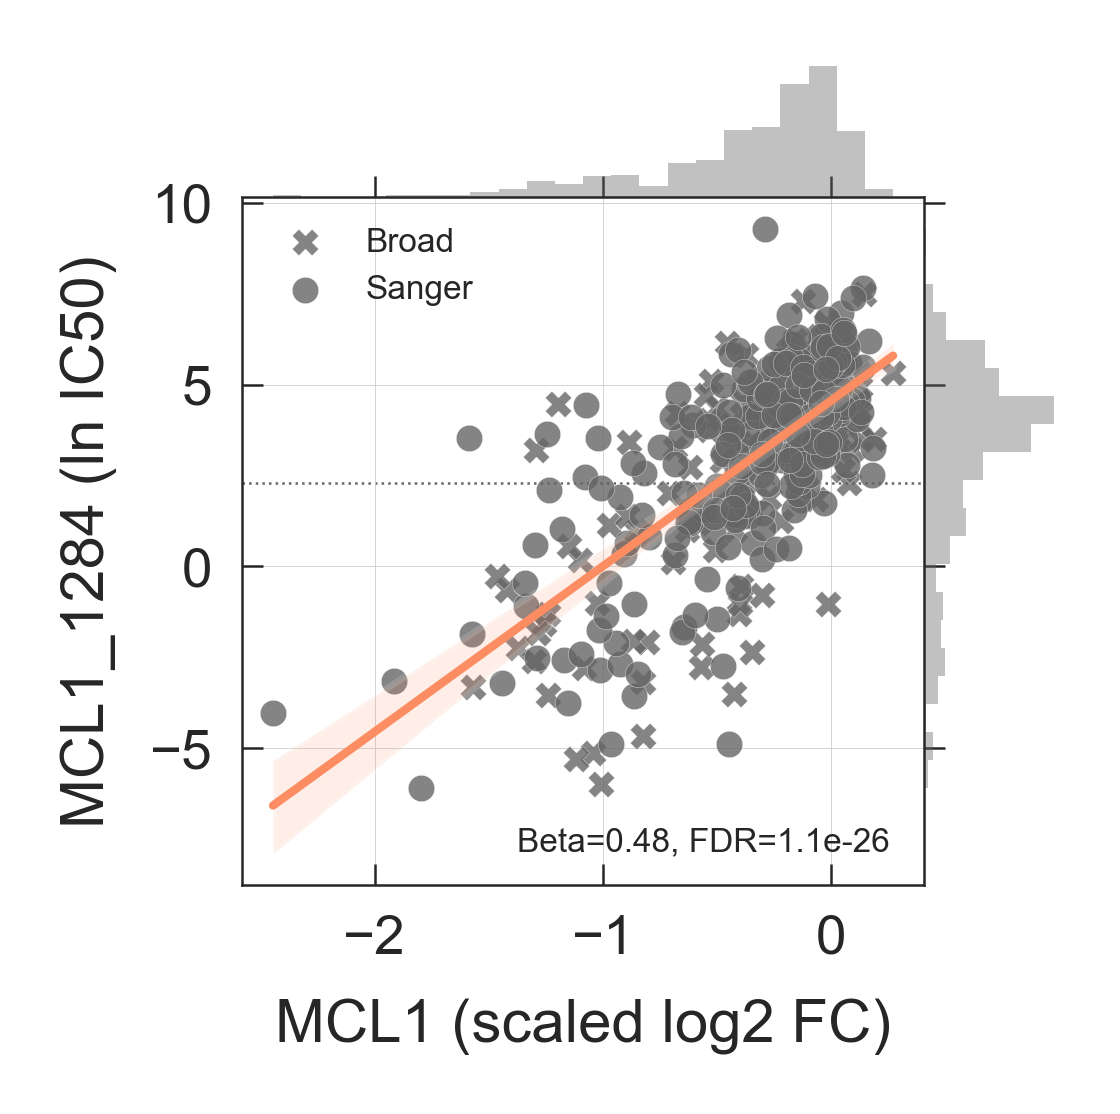

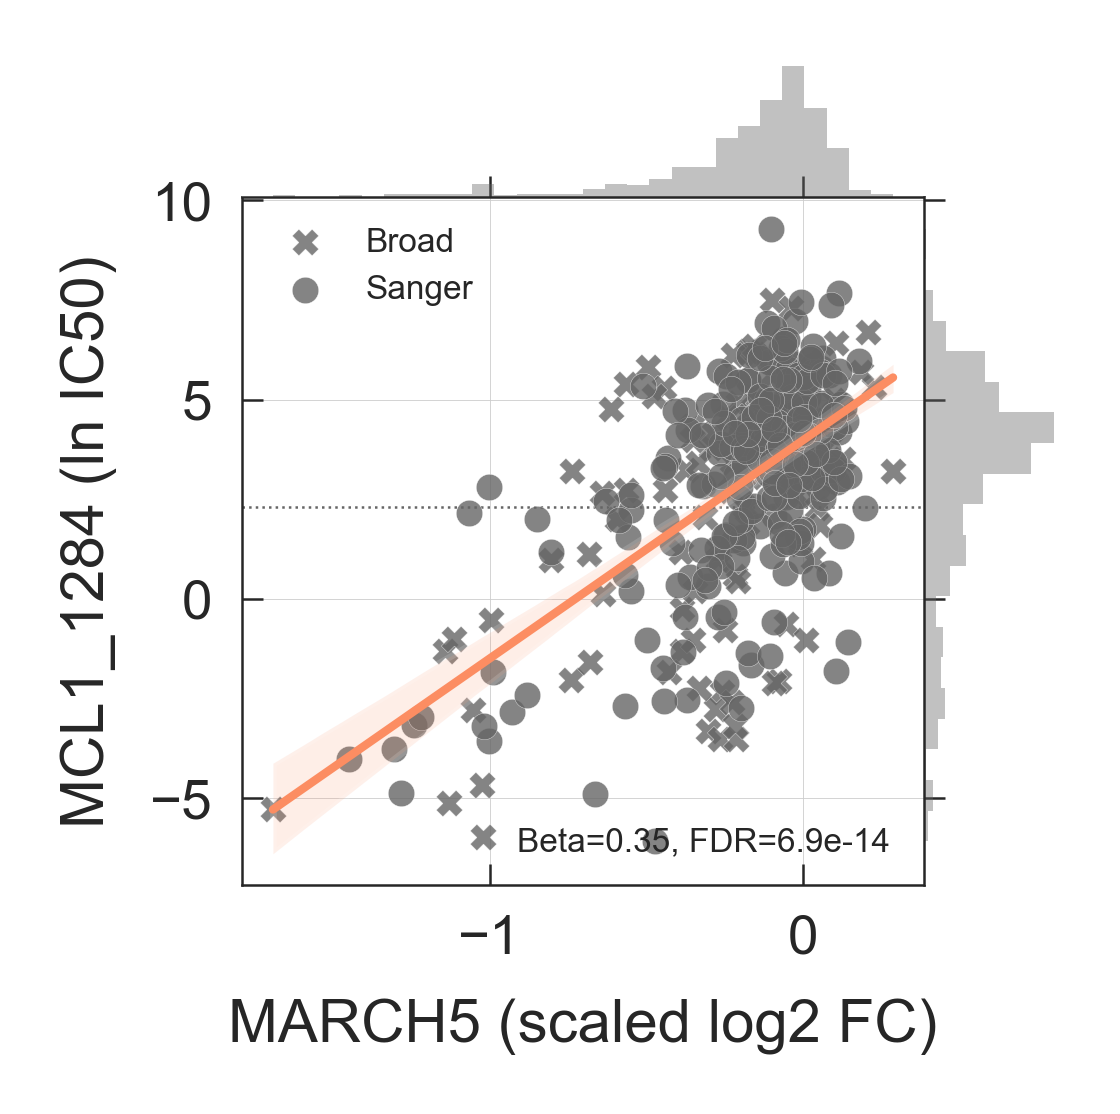

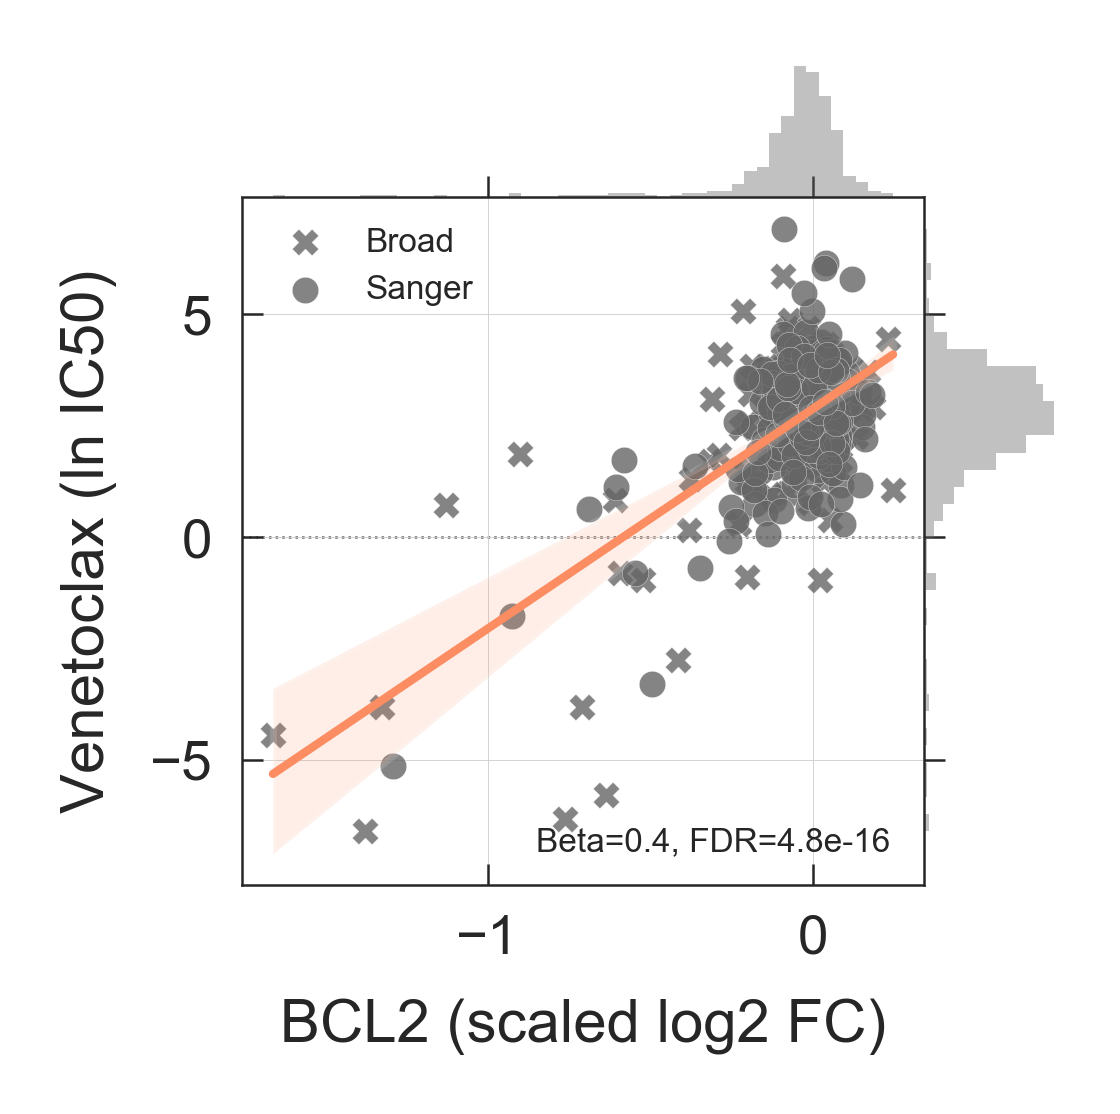

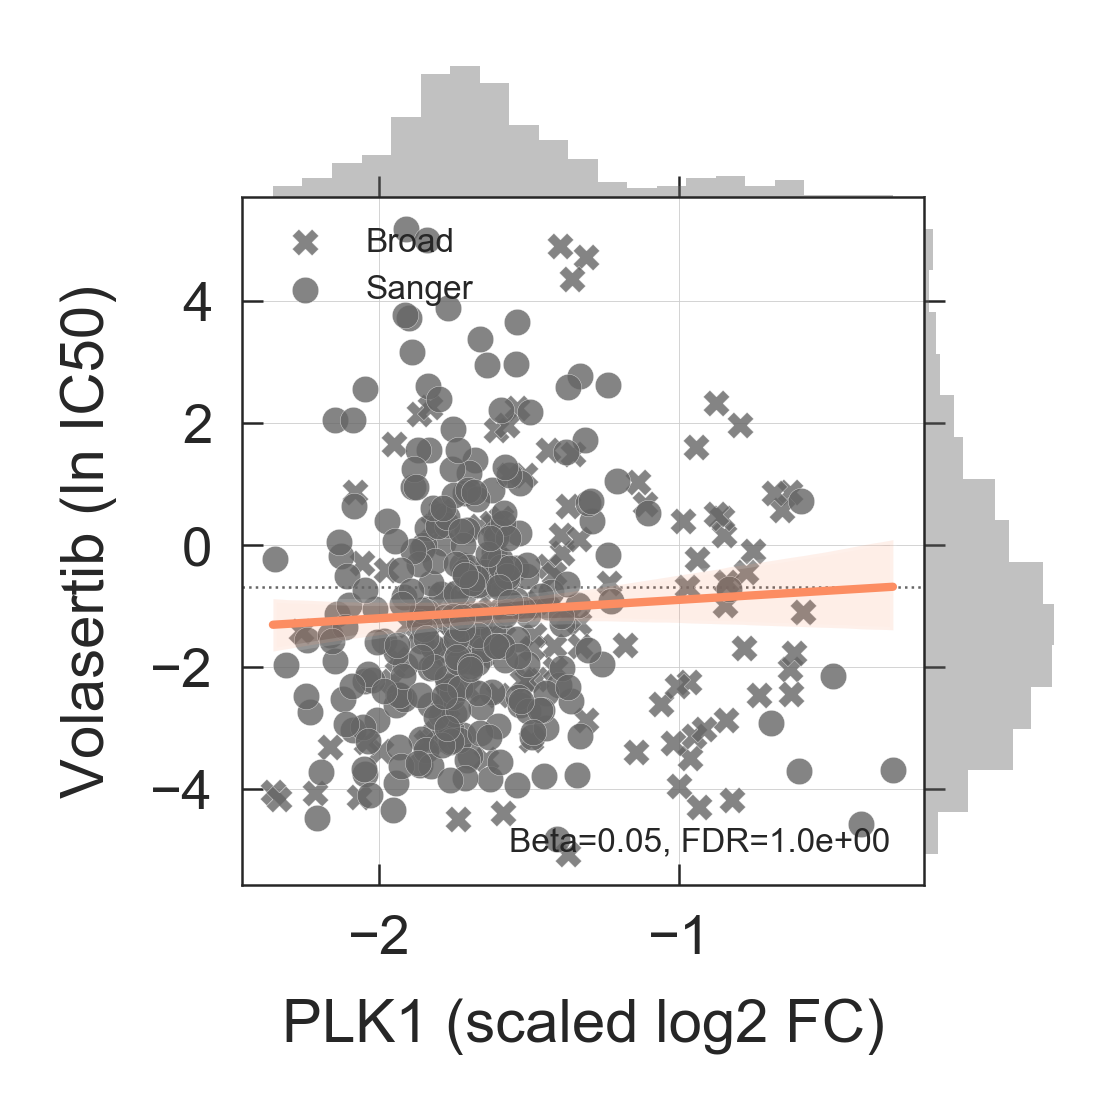

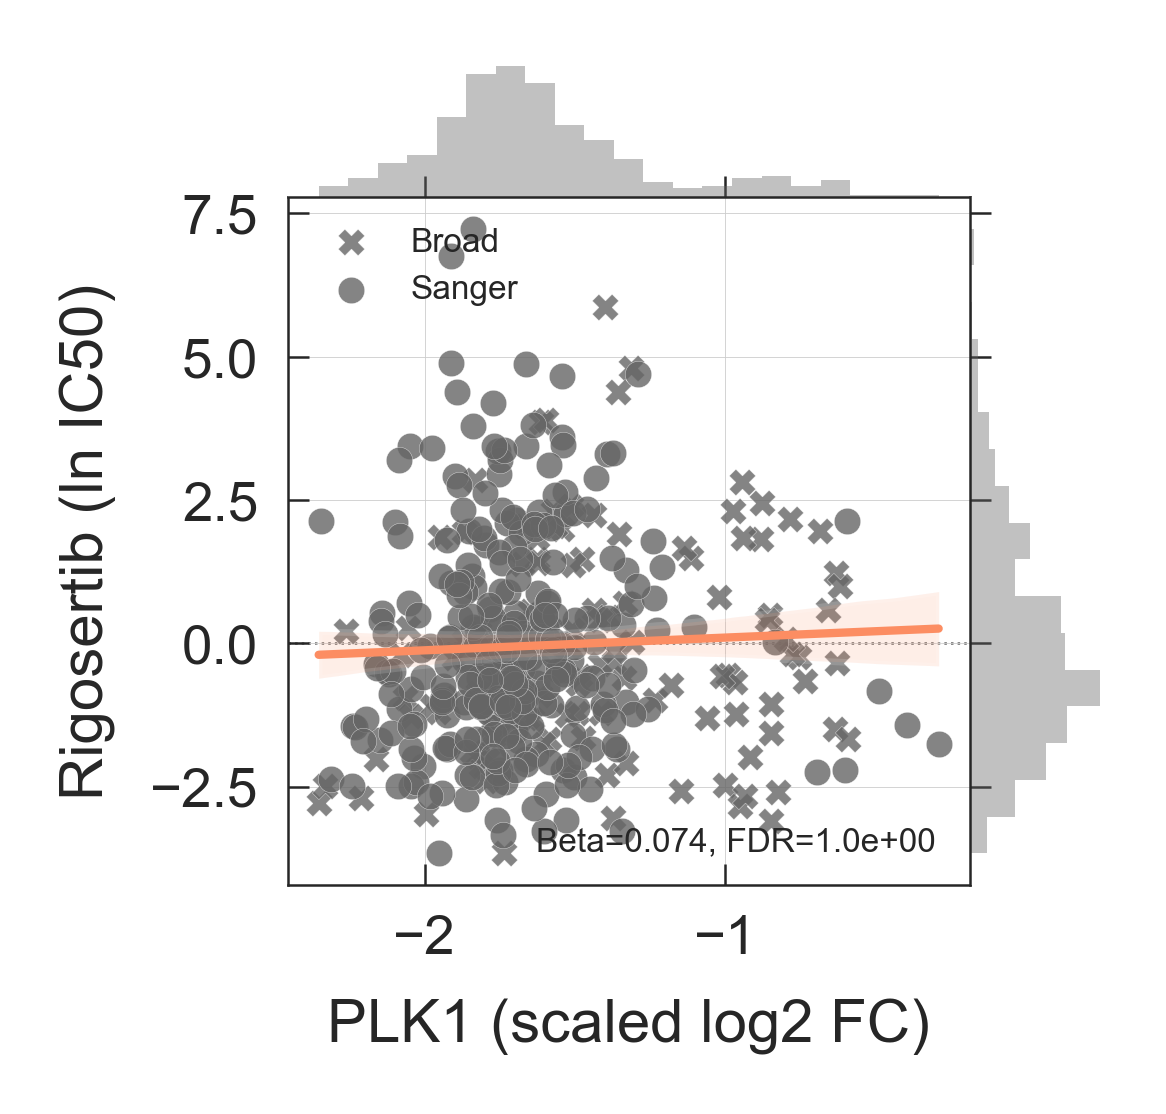

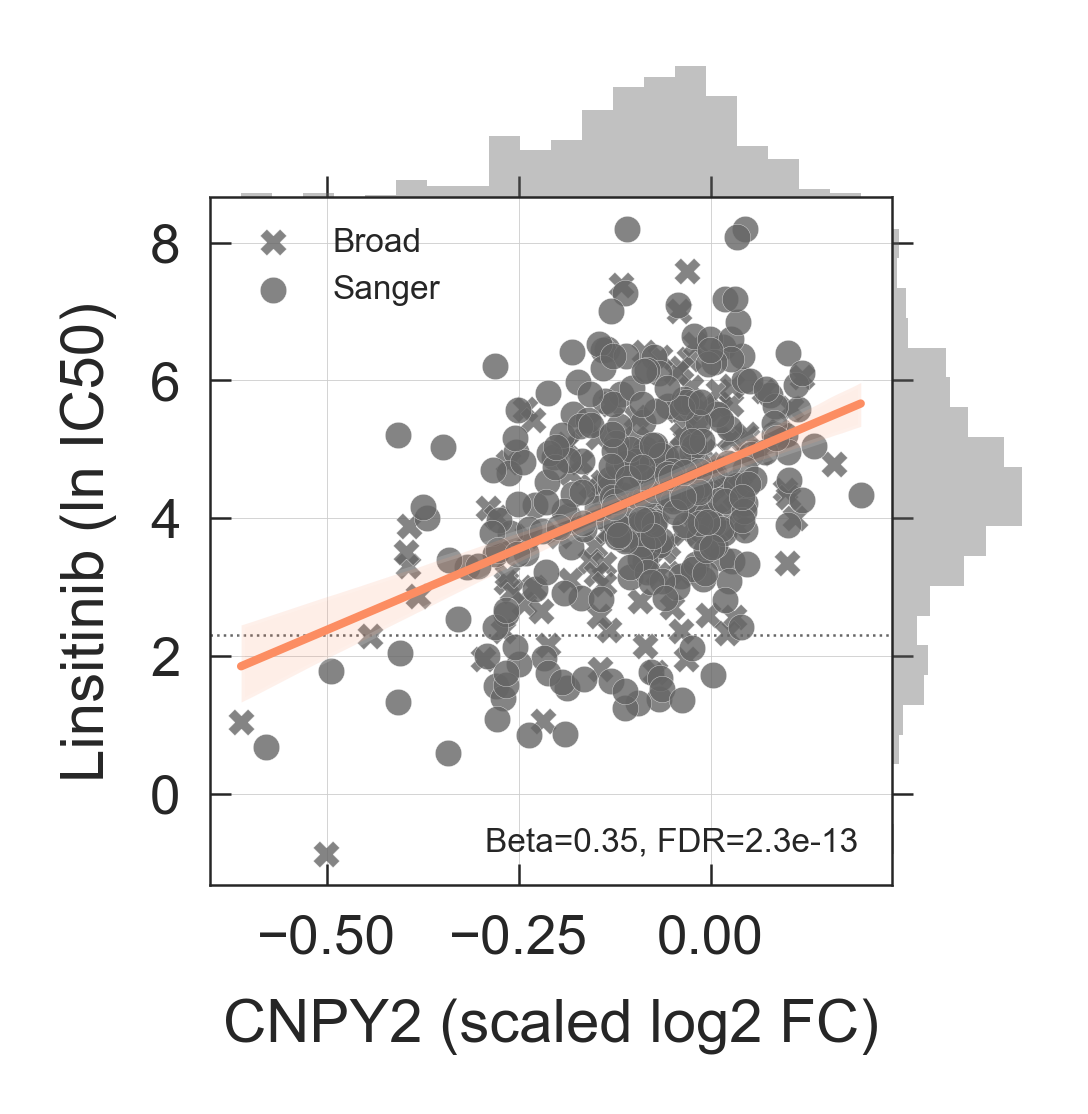

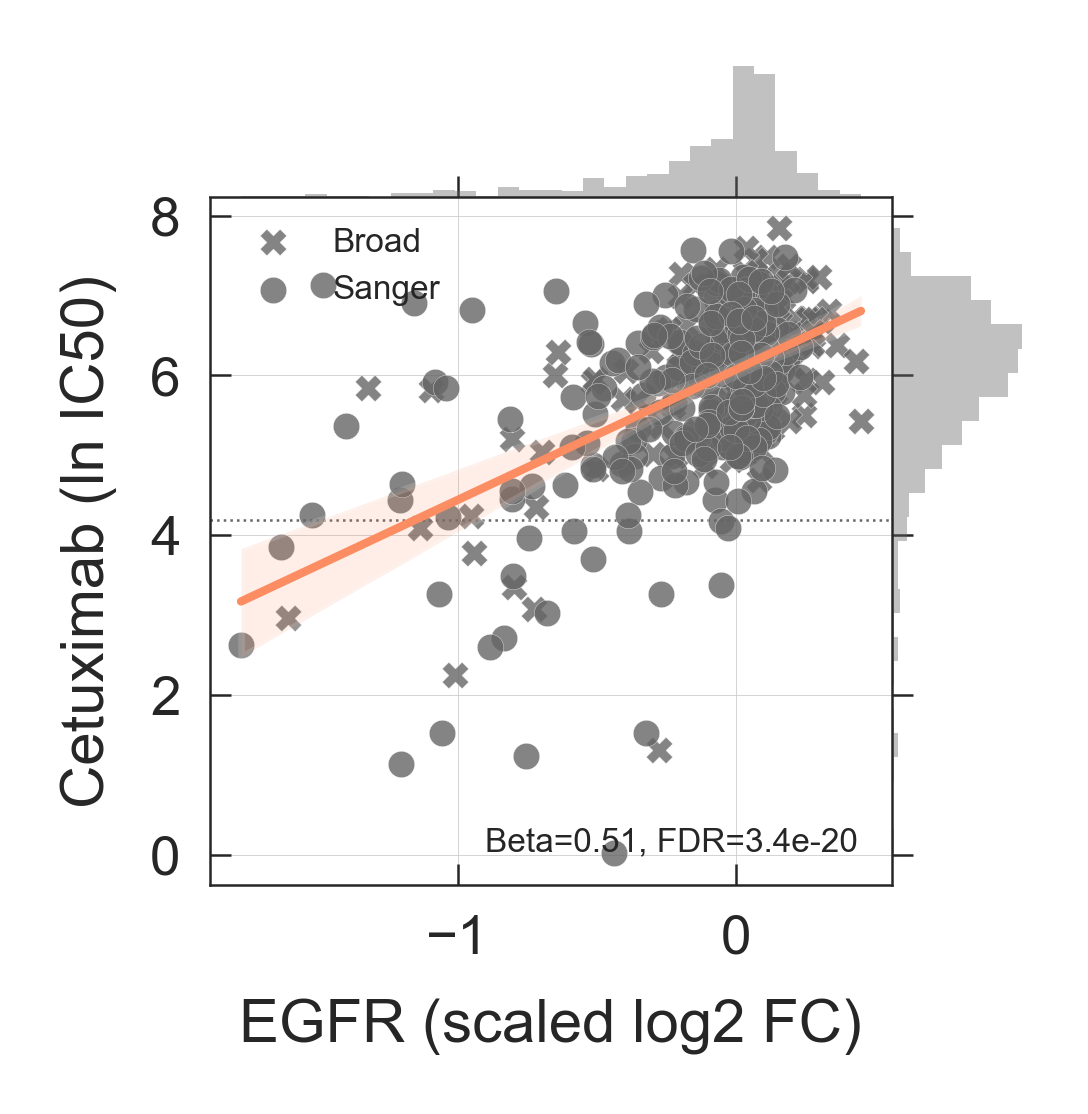

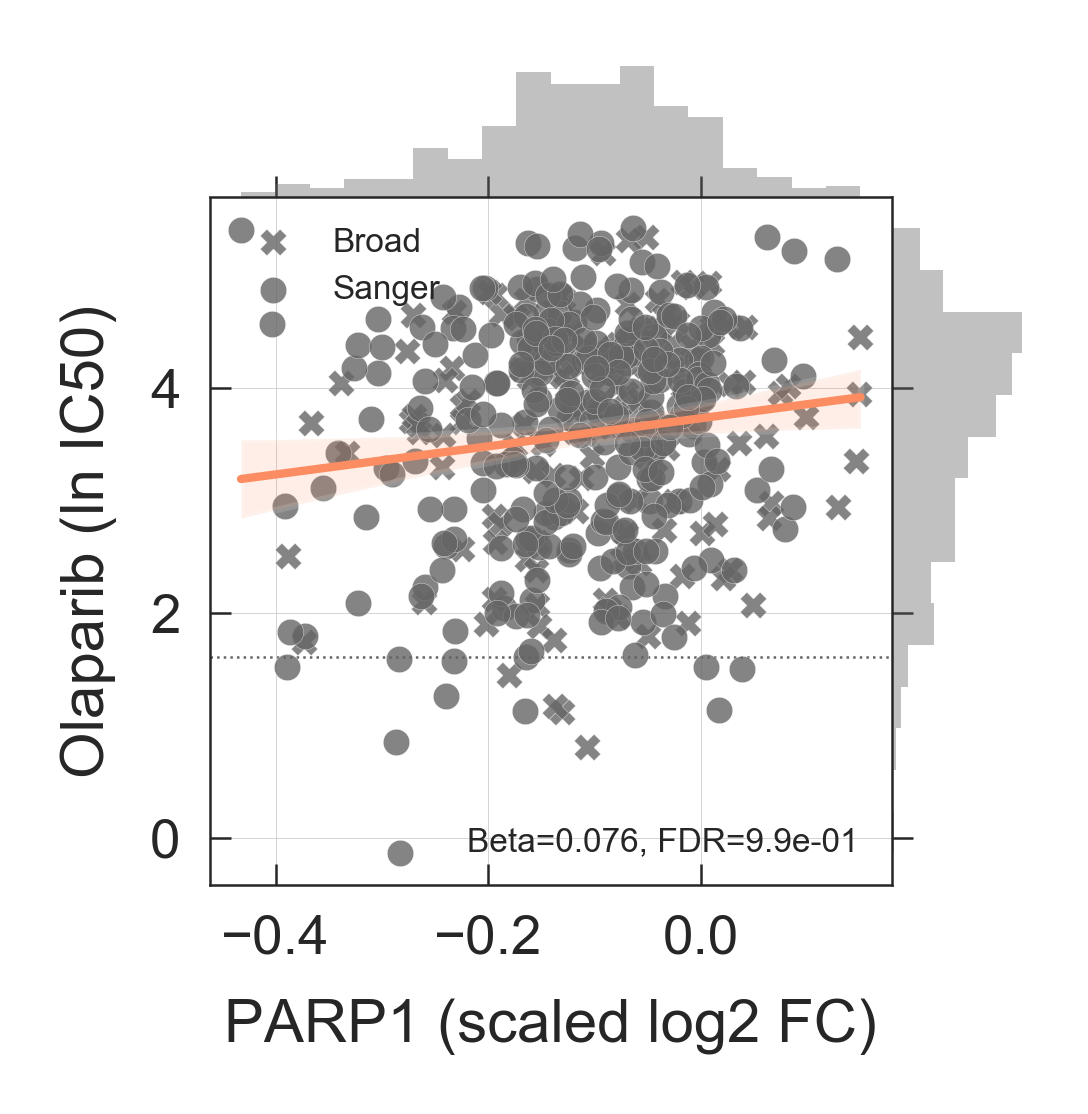

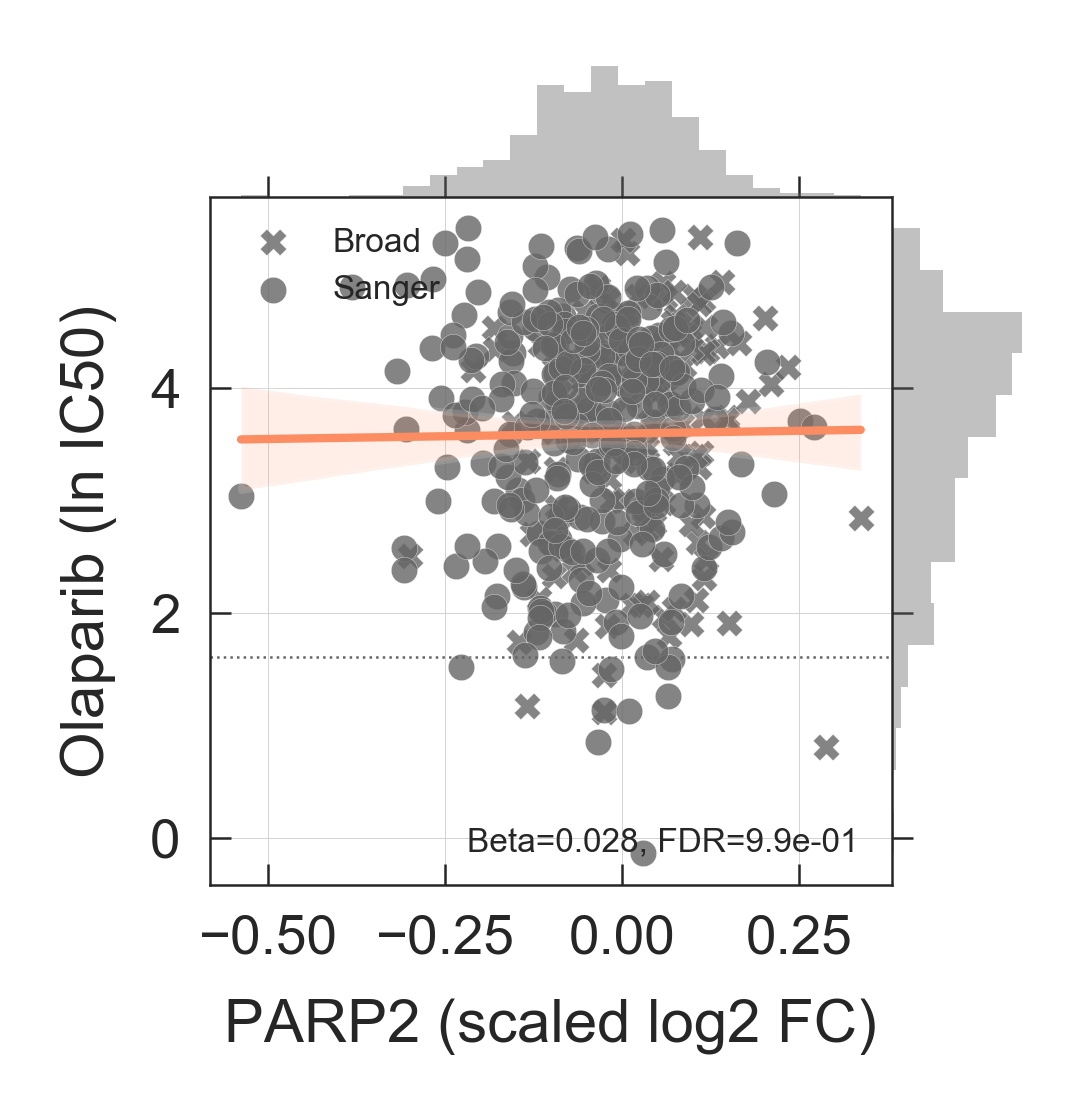

In [10]:
dg = ("Linsitinib", "IGF1R")
for dg in dgs:
    pair = assoc.by(assoc.lmm_drug_crispr, drug_name=dg[0], gene_name=dg[1]).iloc[0]

    drug = tuple(pair[assoc.dcols])

    dmax = np.log(assoc.drespo_obj.maxconcentration[drug])
    annot_text = f"Beta={pair['beta']:.2g}, FDR={pair['fdr']:.1e}"

    plot_df = assoc.build_df(drug=[drug], crispr=[dg[1]], sinfo=["institute"]).dropna()
    plot_df = plot_df.rename(columns={drug: "drug"})

    g = target.plot_corrplot(
        f"crispr_{dg[1]}",
        "drug",
        "institute",
        plot_df,
        annot_text=annot_text,
    )
    g.ax_joint.axhline(
        y=dmax, linewidth=0.3, color=target.PAL_DTRACE[2], ls=":", zorder=0
    )
    g.set_axis_labels(f"{dg[1]} (scaled log2 FC)", f"{dg[0]} (ln IC50)")
    plt.gcf().set_size_inches(1.5, 1.5)
    plt.savefig(
        f"{rpath}/association_drug_scatter_{dg[0]}_{dg[1]}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

Kinobeads drug-protein affinity measurements for 84 kinase inhibitors were obtained from an independent study [1] as
aparent pKd (nM). These were ploted for the signifincant associations versus non-significant (Log-ratio test BH-FDR)
found in our study.


[1] Klaeger S, Heinzlmeir S, Wilhelm M, Polzer H, Vick B, Koenig P-A, Reinecke M, Ruprecht B, Petzoldt S, Meng C,
Zecha J, Reiter K, Qiao H, Helm D, Koch H, Schoof M, Canevari G, Casale E, Depaolini SR, Feuchtinger A, et al. (2017)
The target landscape of clinical kinase drugs. Science 358: eaan4368

[2019-11-20 11:06:12,257 - INFO]: Mann-Whitney U statistic=4285.50, p-value=1.22e-06


<Figure size 225x600 with 0 Axes>

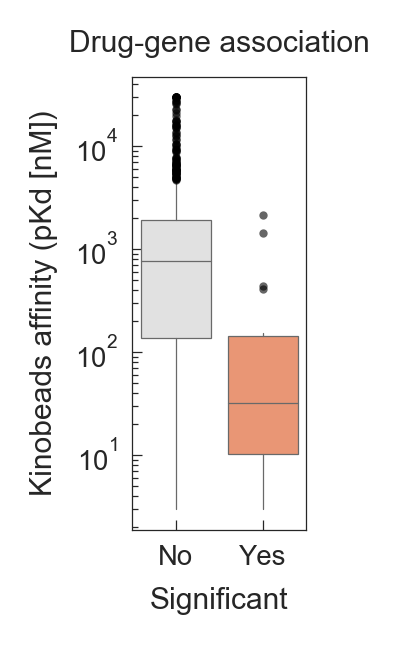

In [11]:
plt.figure(figsize=(0.75, 2.0), dpi=300)
target.boxplot_kinobead()
plt.savefig(
    f"{rpath}/target_benchmark_kinobeads.pdf", bbox_inches="tight", transparent=True
)
plt.show()

Association effect sizes with between drugs and their know targets

[2019-11-20 11:06:19,387 - INFO]: Mann-Whitney U statistic=1729866637.00, p-value=4.17e-118


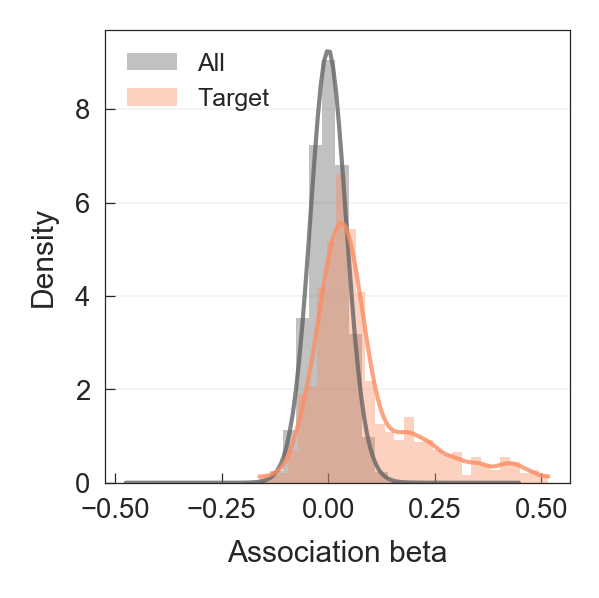

In [12]:
plt.figure(figsize=(2, 2), dpi=300)
target.beta_histogram()
plt.savefig(
    f"{rpath}/target_benchmark_beta_histogram.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

P-value histogram of the Drug-Genes associations highlighting Drug-Target associations.

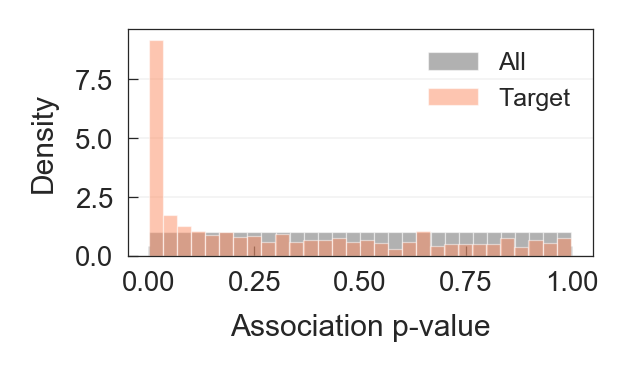

In [13]:
plt.figure(figsize=(2, 1), dpi=300)
target.pval_histogram()
plt.savefig(
    f"{rpath}/target_benchmark_pval_histogram.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Distribution of the signifcant Drug-Gene associations across a protein-protein interaction network, with
gene-essentiality and gene-expression.

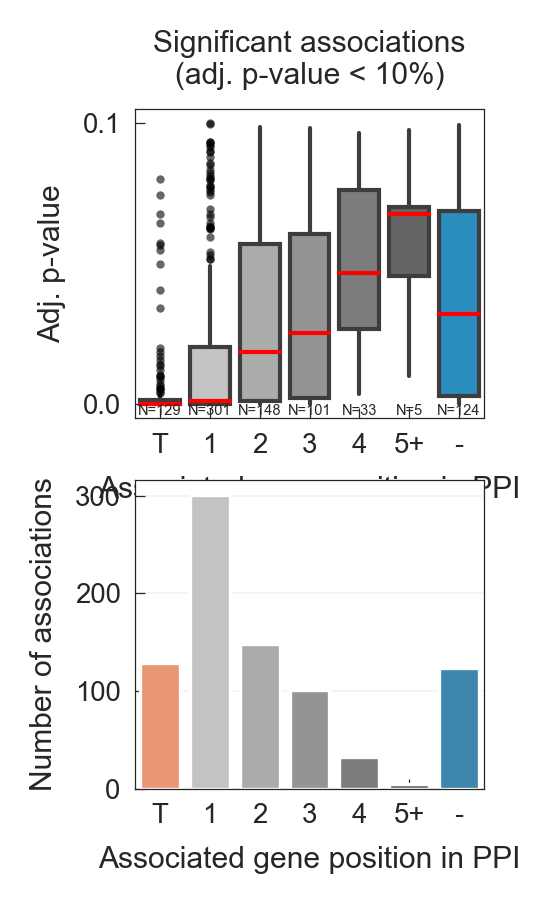

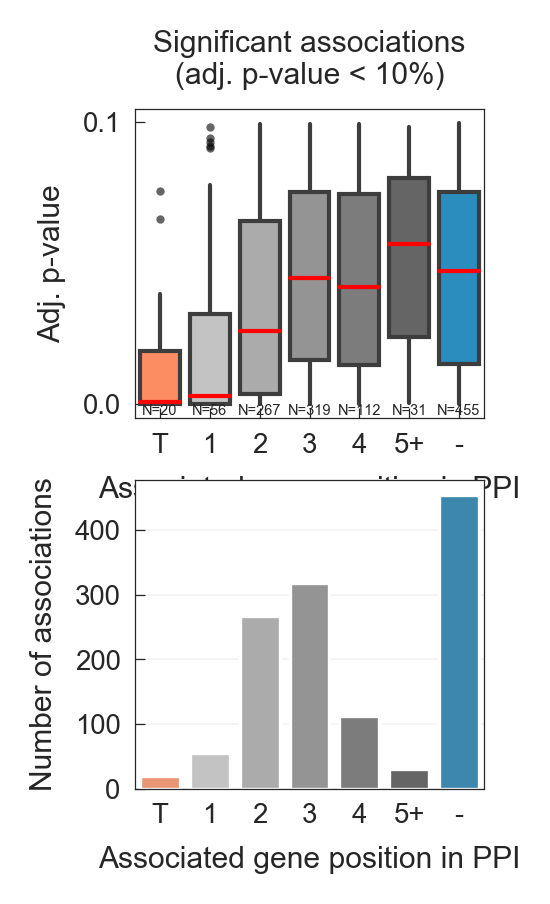

In [14]:
for dtype in ["crispr", "gexp"]:
    fig, axs = plt.subplots(2, 1, figsize=(1.5, 3), dpi=300)

    # Boxplot
    target.drugs_ppi(dtype, ax=axs[0])

    axs[0].set_xlabel("Associated gene position in PPI")
    axs[0].set_ylabel("Adj. p-value")
    axs[0].set_title("Significant associations\n(adj. p-value < 10%)")

    # Count plot
    target.drugs_ppi_countplot(dtype, ax=axs[1])

    axs[1].set_xlabel("Associated gene position in PPI")
    axs[1].set_ylabel("Number of associations")

    plt.savefig(
        f"{rpath}/target_benchmark_ppi_distance_{dtype}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

Background distribution of all Drug-Gene associations tested.

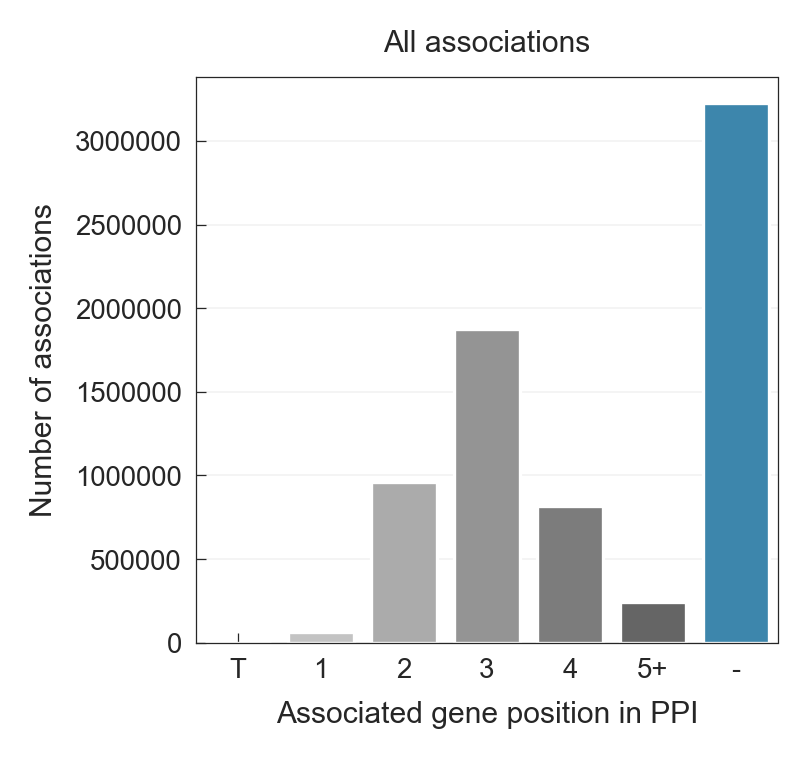

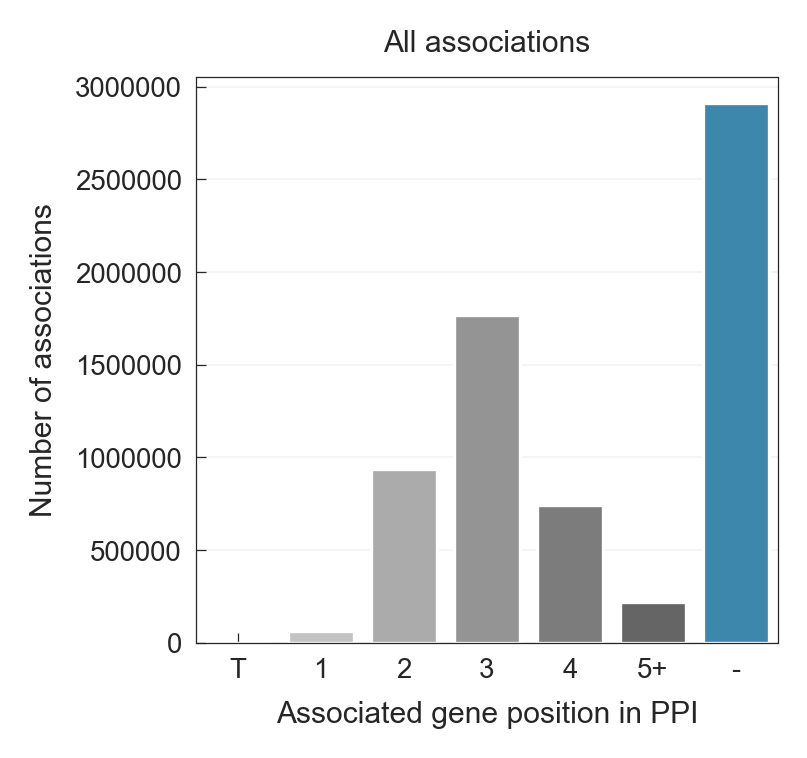

In [15]:
for dtype in ["crispr", "gexp"]:
    plt.figure(figsize=(2.5, 2.5), dpi=300)
    target.drugs_ppi_countplot_background(dtype)
    plt.savefig(
        f"{rpath}/target_benchmark_ppi_distance_{dtype}_countplot_bkg.pdf",
        bbox_inches="tight",
        transparent=True,
    )

Breakdown numbers of (i) all the drugs screened, (ii) unique drugs, (iii) their annotation status, and (iv) those
which at least one of the canonical targets were targeted with the CRISPR-Cas9 screen.

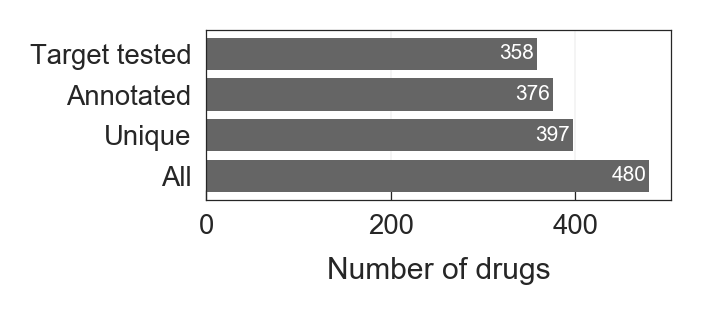

In [16]:
plt.figure(figsize=(2, 0.75), dpi=300)
target.countplot_drugs()
plt.savefig(
    f"{rpath}/target_benchmark_association_countplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Histogram of drugs with at least one significant association across the protein-protein network

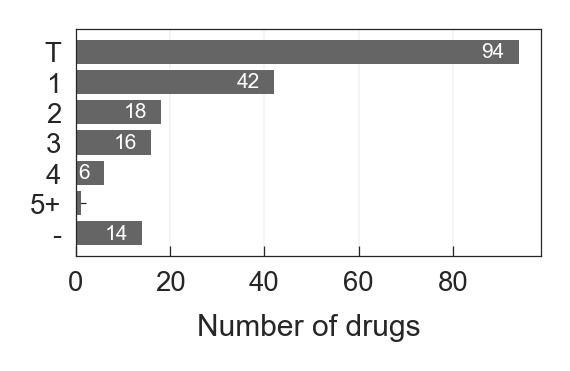

In [17]:
plt.figure(figsize=(2, 1), dpi=300)
target.countplot_drugs_significant()
plt.savefig(
    f"{rpath}/target_benchmark_association_signif_countplot.pdf",
    bbox_inches="tight",
    transparent=True,
)

Pie chart and barplot of significant associations per unique durgs ordered by distance in the PPI

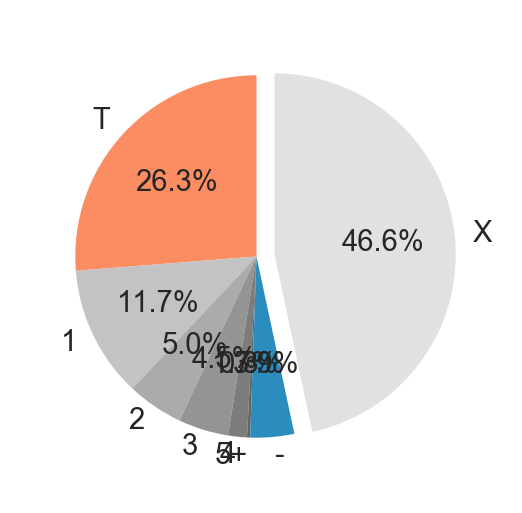

In [18]:
plt.figure(figsize=(2, 2), dpi=300)
target.pichart_drugs_significant()
plt.savefig(
    f"{rpath}/target_benchmark_association_signif_piechart.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

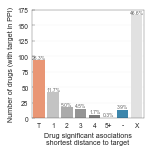

In [19]:
target.barplot_drugs_significant()
plt.savefig(
    f"{rpath}/target_benchmark_association_signif_barplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Number of significant associations found with drugs from the two different types of screening proceedures

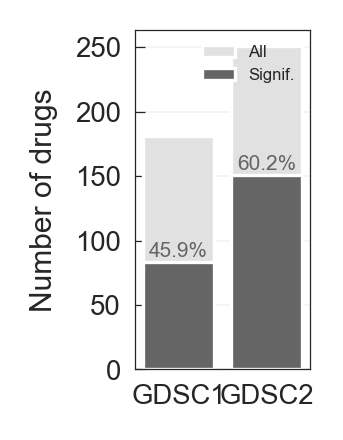

In [20]:
plt.figure(figsize=(0.75, 1.5), dpi=300)
target.signif_per_screen()
plt.savefig(
    f"{rpath}/target_benchmark_significant_by_screen.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Heatmap counting the number of drugs which have a significant association with CRISPR and/or with a genomic marker

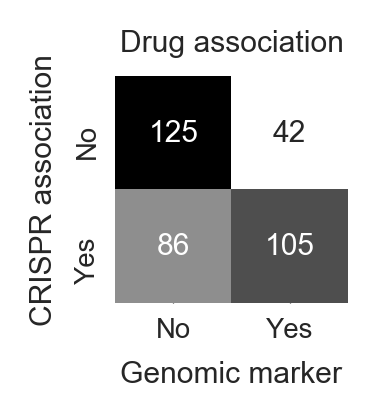

In [21]:
plt.figure(figsize=(1, 1), dpi=300)
target.signif_genomic_markers()
plt.savefig(
    f"{rpath}/target_benchmark_signif_genomic_heatmap.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Significant associations p-value (y-axis) spread across the number of times a drug displayed an IC50 lower than the
maximum screened concentration.

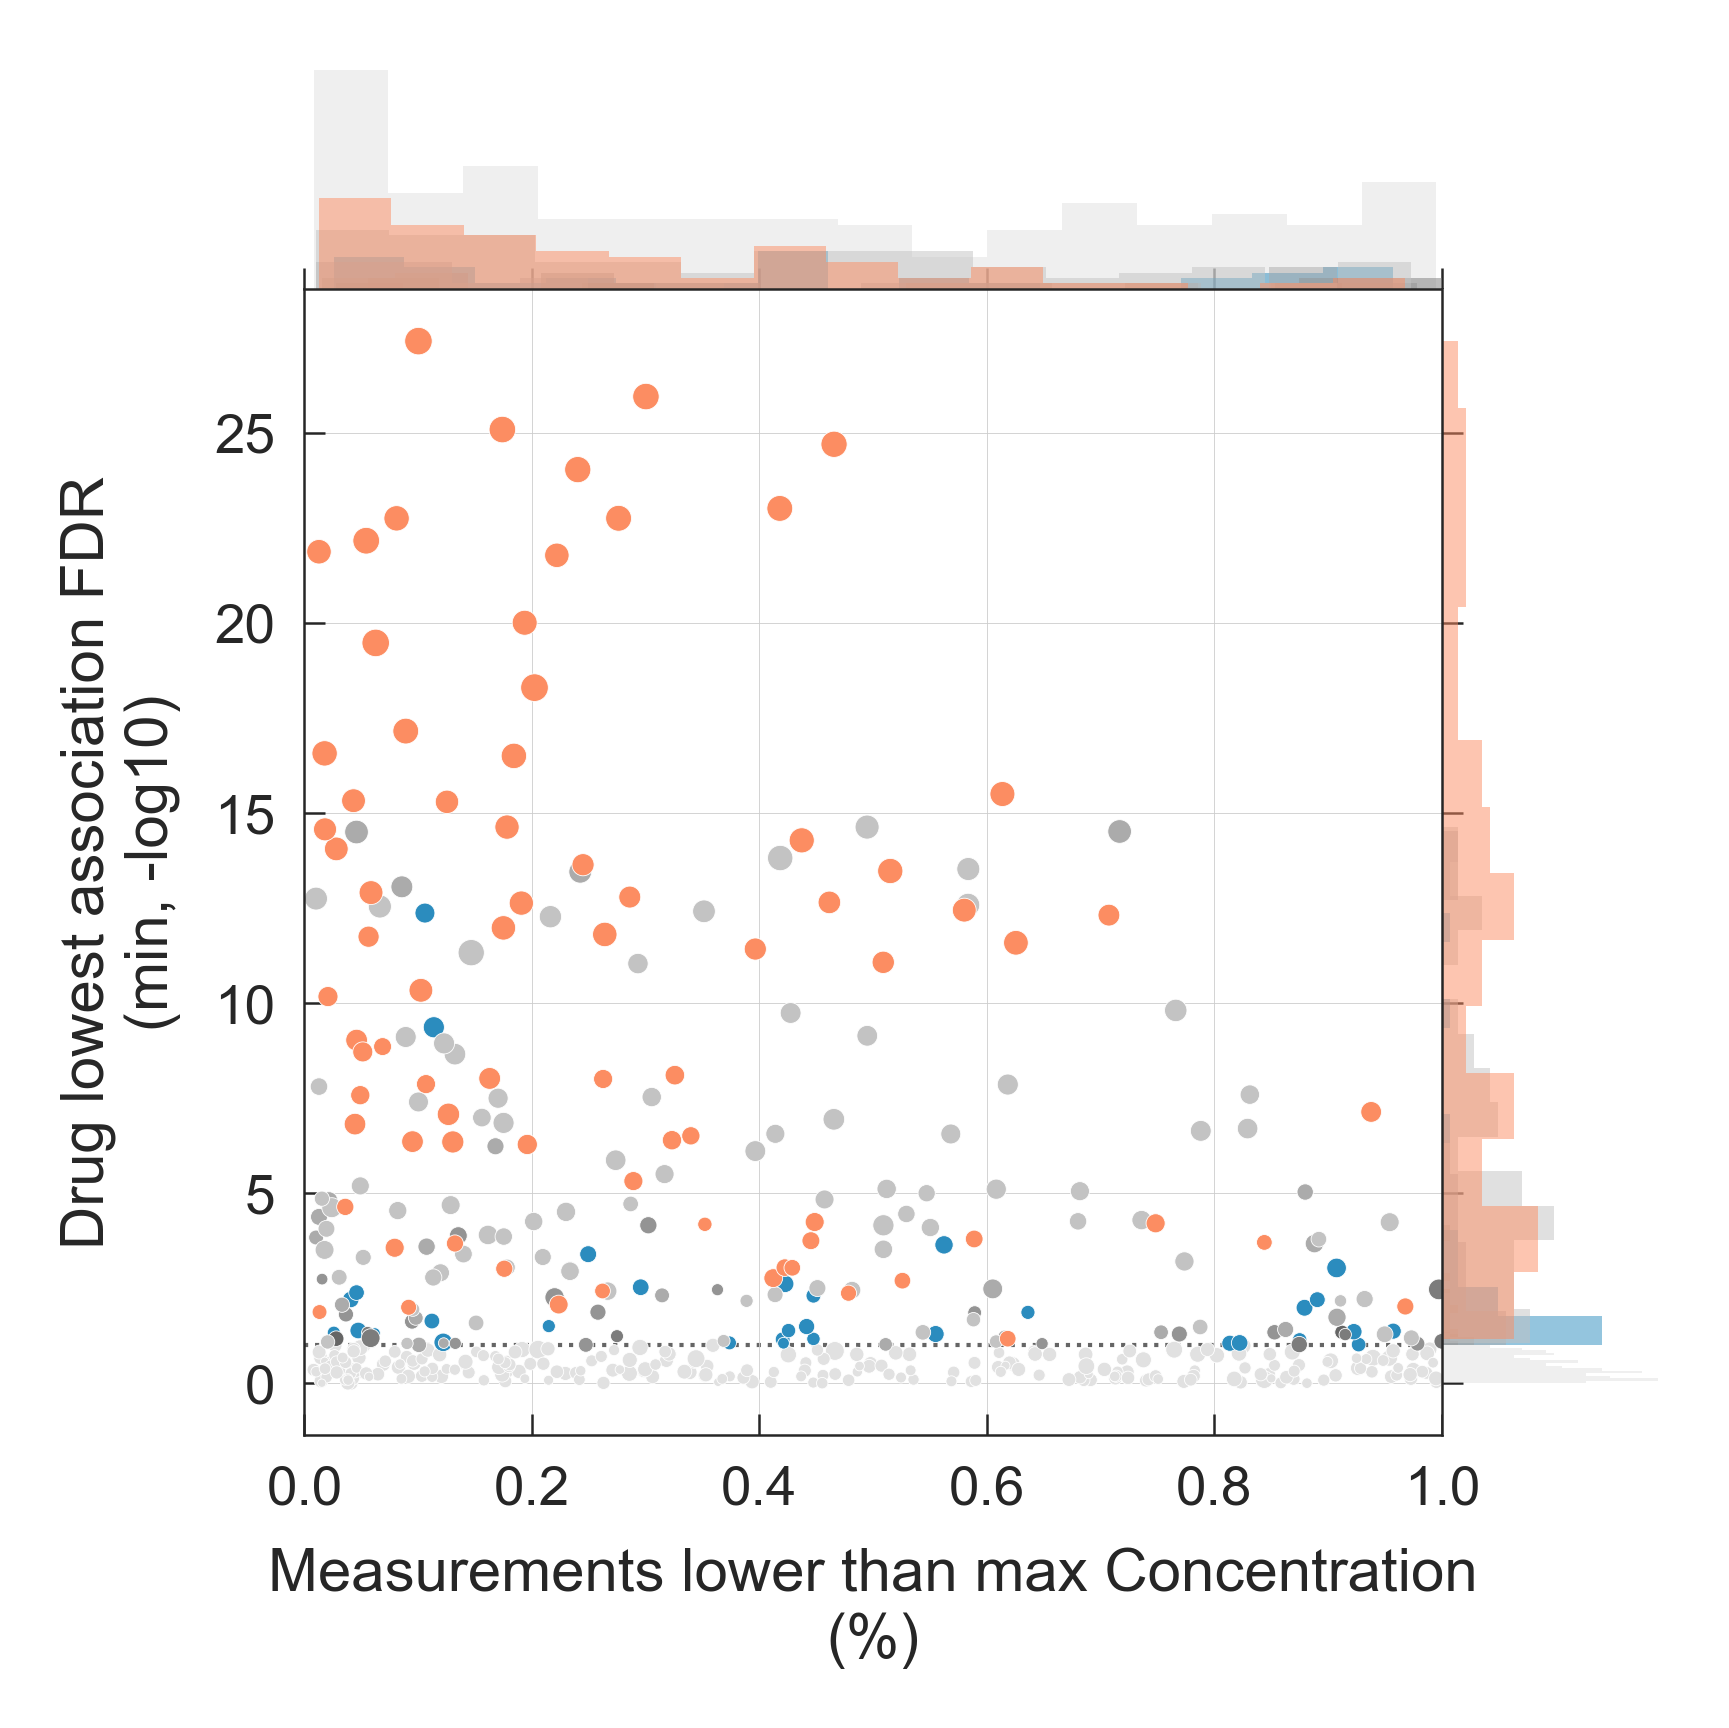

In [22]:
target.signif_maxconcentration_scatter()
plt.gcf().set_size_inches(2.5, 2.5)
plt.savefig(
    f"{rpath}/target_benchmark_signif_scatter_maxconcentration.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Drug-Gene CRISPR associations p-value (-log10) versus Drug-Genomic associations p-value (-log10).

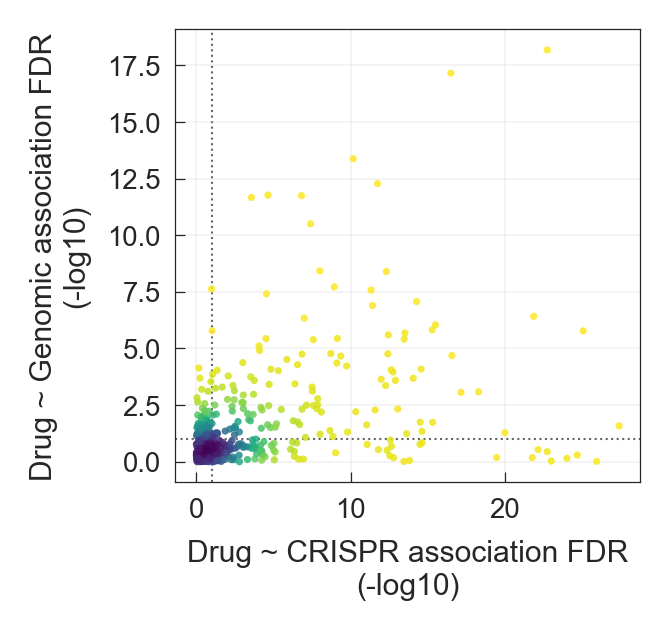

In [23]:
plt.figure(figsize=(2, 2), dpi=300)
target.signif_fdr_scatter()
plt.savefig(
    f"{rpath}/target_benchmark_signif_fdr_scatter.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Top associations

In [24]:
drugs = [
    "AZD5582",
    "IAP_5620",
    "VE821",
    "AZD6738",
    "VE-822",
    "Cetuximab",
]

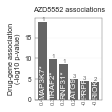

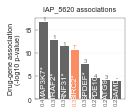

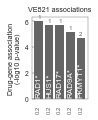

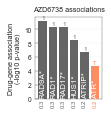

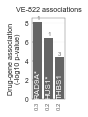

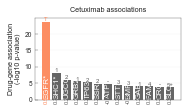

In [25]:
for d in drugs:
    plot_df = target.drug_top_associations(d, fdr_thres=0.25)
    plt.gcf().set_size_inches(.2 * plot_df.shape[0], 1.5)
    plt.savefig(
        f"{rpath}/target_benchmark_top_associations_barplot_{d}.pdf",
        bbox_inches="tight",
        transparent=True,
        dpi=600,
    )
    plt.show()

PARP inhibitors (olaparib and talazoparib) associations

In [26]:
genes = ["STAG1", "LIG1", "FLI1", "PARP1", "PARP2", "PARP3", "PCGF5", "XRCC1", "RHNO1"]

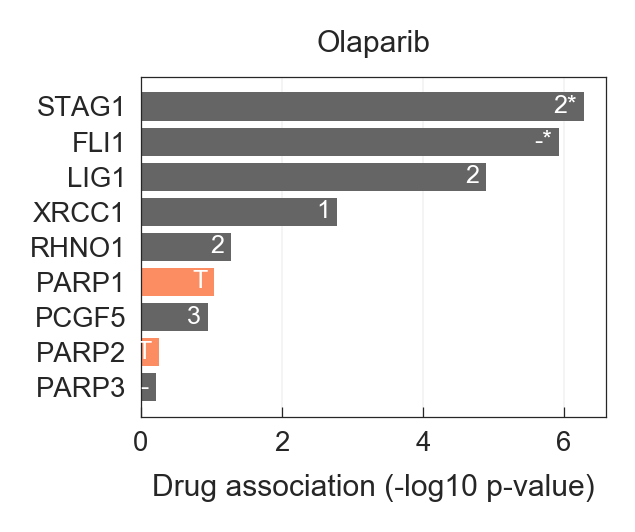

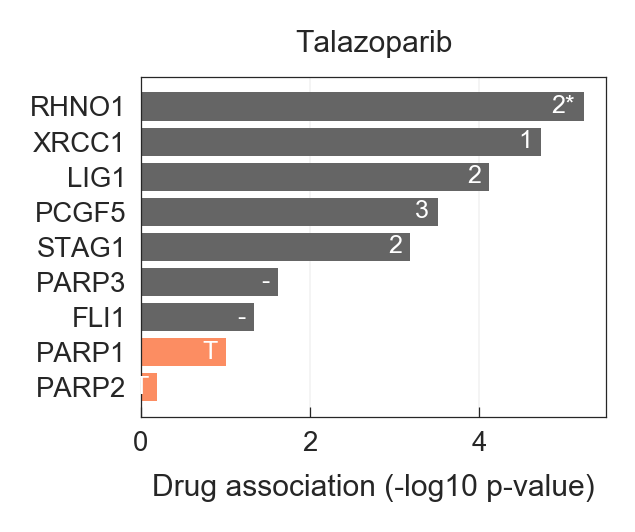

In [27]:
for drug in ["Olaparib", "Talazoparib"]:
    plt.figure(figsize=(2, 1.5), dpi=300)
    target.drug_notarget_barplot(drug, genes)
    plt.savefig(
        f"{rpath}/target_benchmark_drug_notarget_{drug}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

Clustermap of drug association betas

In [28]:
betas_crispr = pd.pivot_table(
    assoc.lmm_drug_crispr.query("VERSION == 'GDSC2'"),
    index=["DRUG_ID", "DRUG_NAME"],
    columns="GeneSymbol",
    values="beta",
)

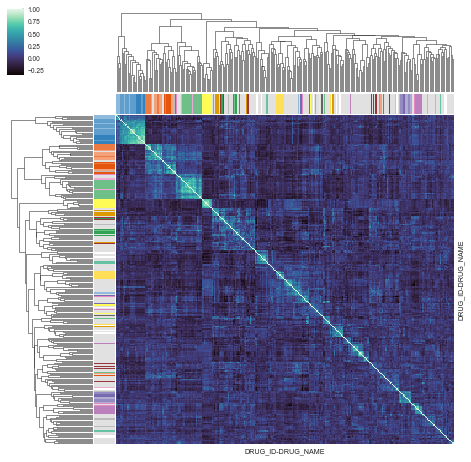

In [29]:
target.lmm_betas_clustermap(betas_crispr)
plt.gcf().set_size_inches(8, 8)
plt.savefig(
    f"{rpath}/target_benchmark_clustermap_betas_crispr.png",
    bbox_inches="tight",
    dpi=300,
)
plt.show()

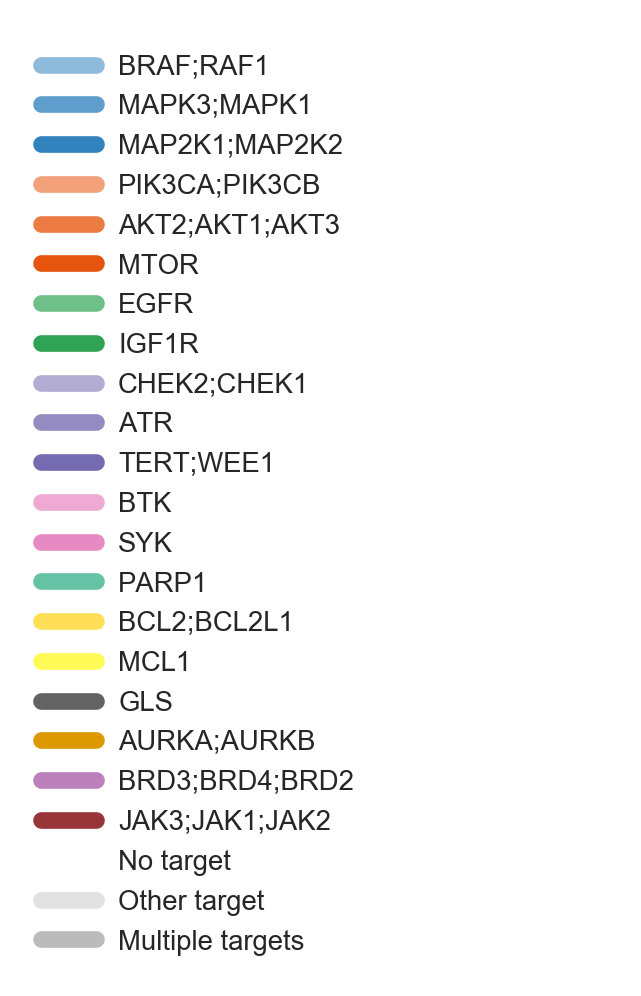

In [30]:
plt.figure(figsize=(2, 2), dpi=300)
target.lmm_betas_clustermap_legend()
plt.axis("off")
plt.savefig(
    f"{rpath}/target_benchmark_clustermap_betas_crispr_legend.pdf", bbox_inches="tight"
)
plt.show()

Drug association with gene-expression

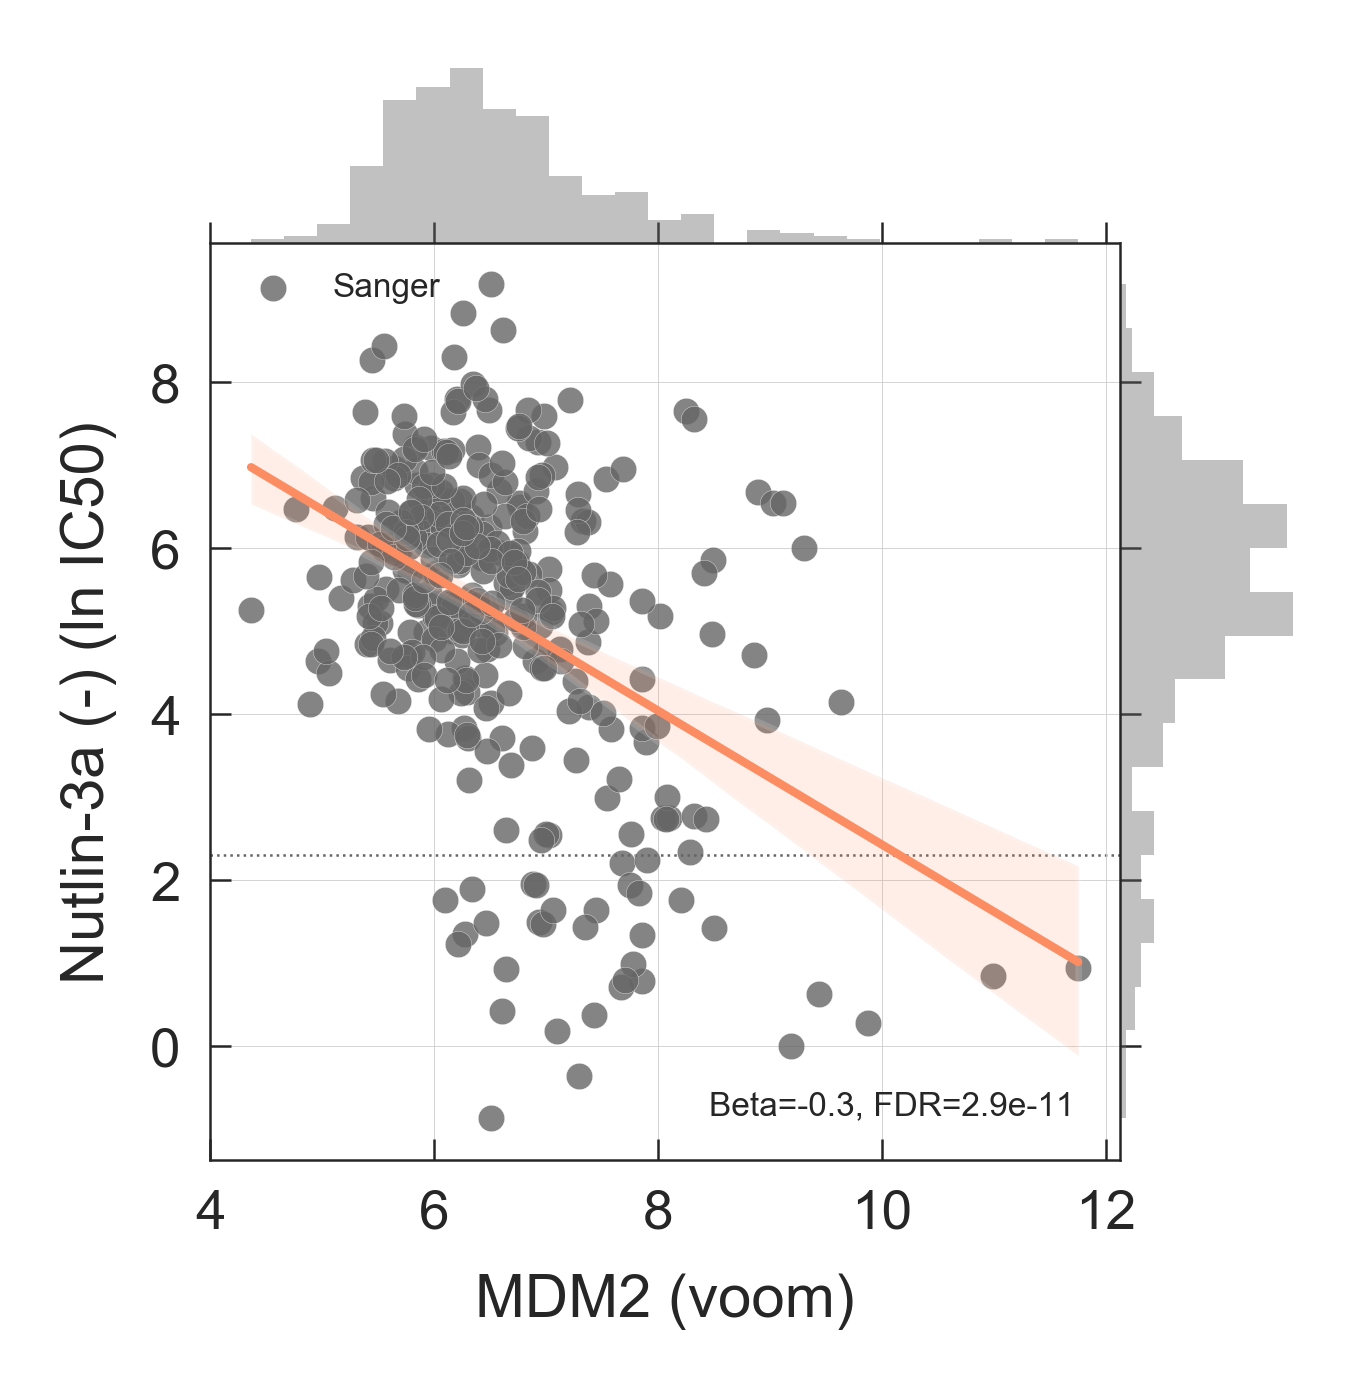

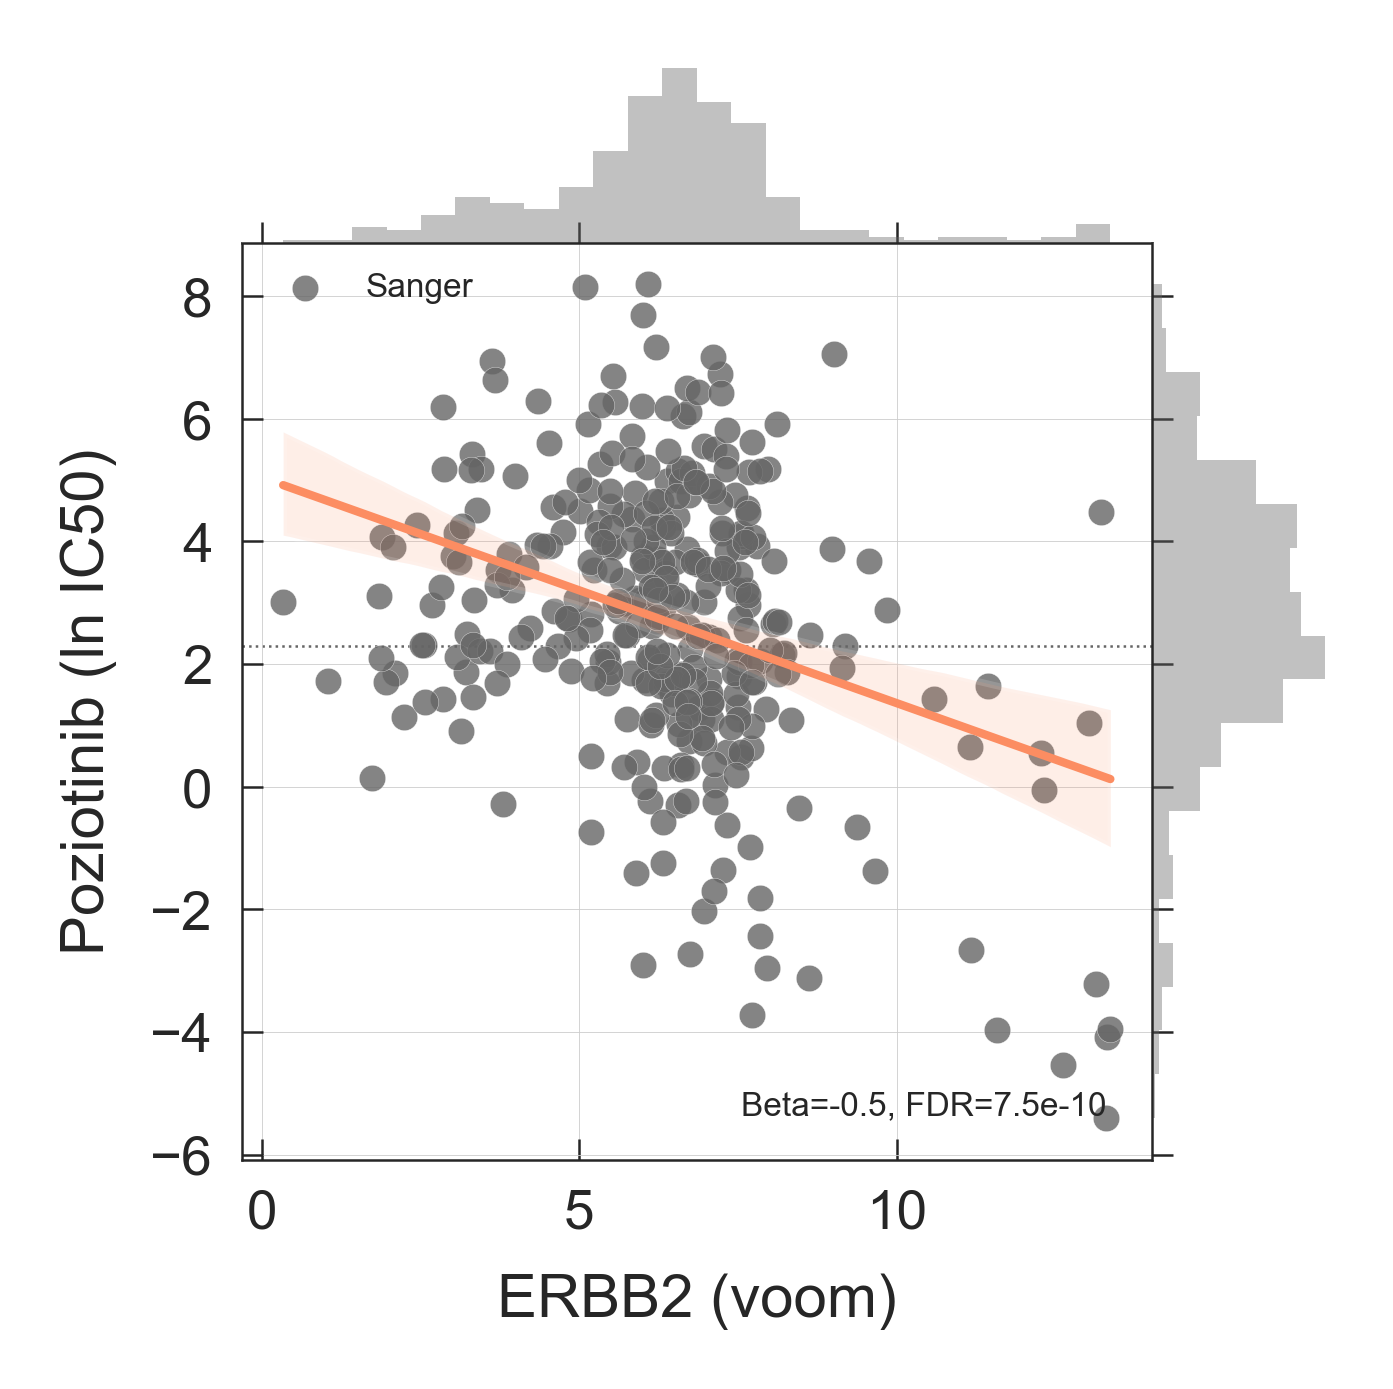

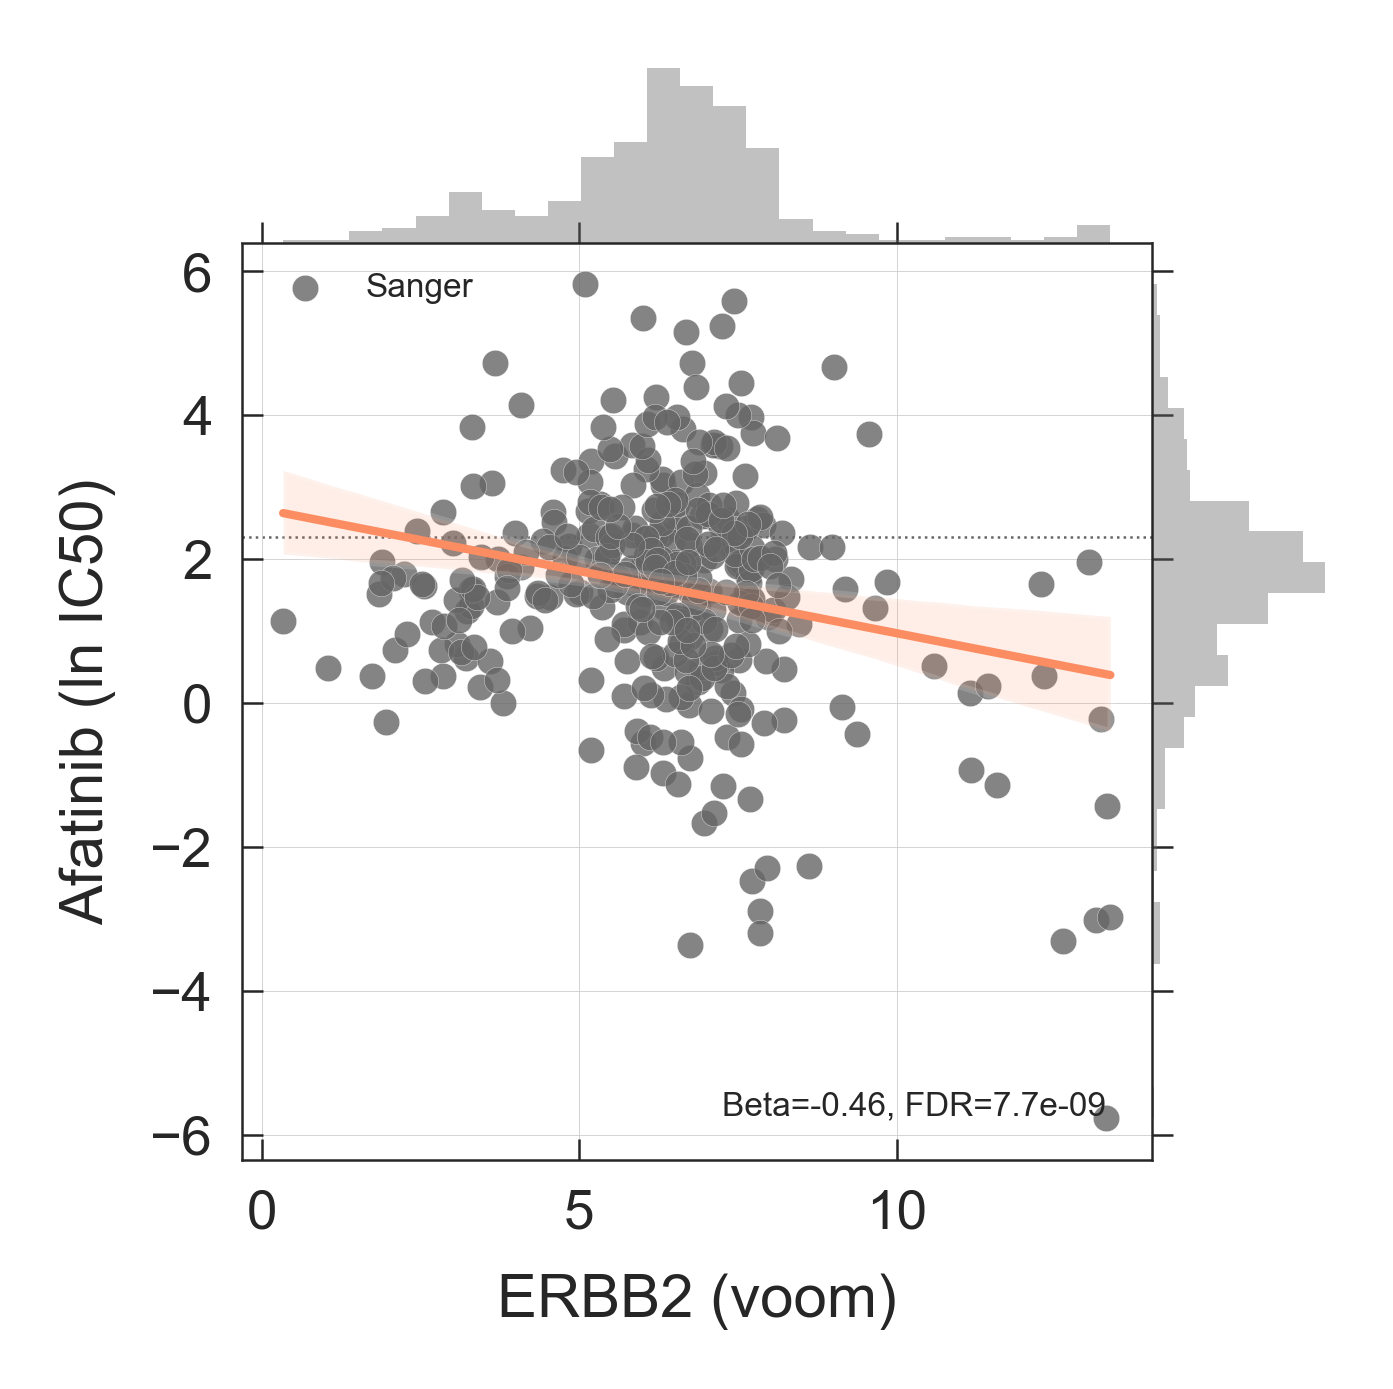

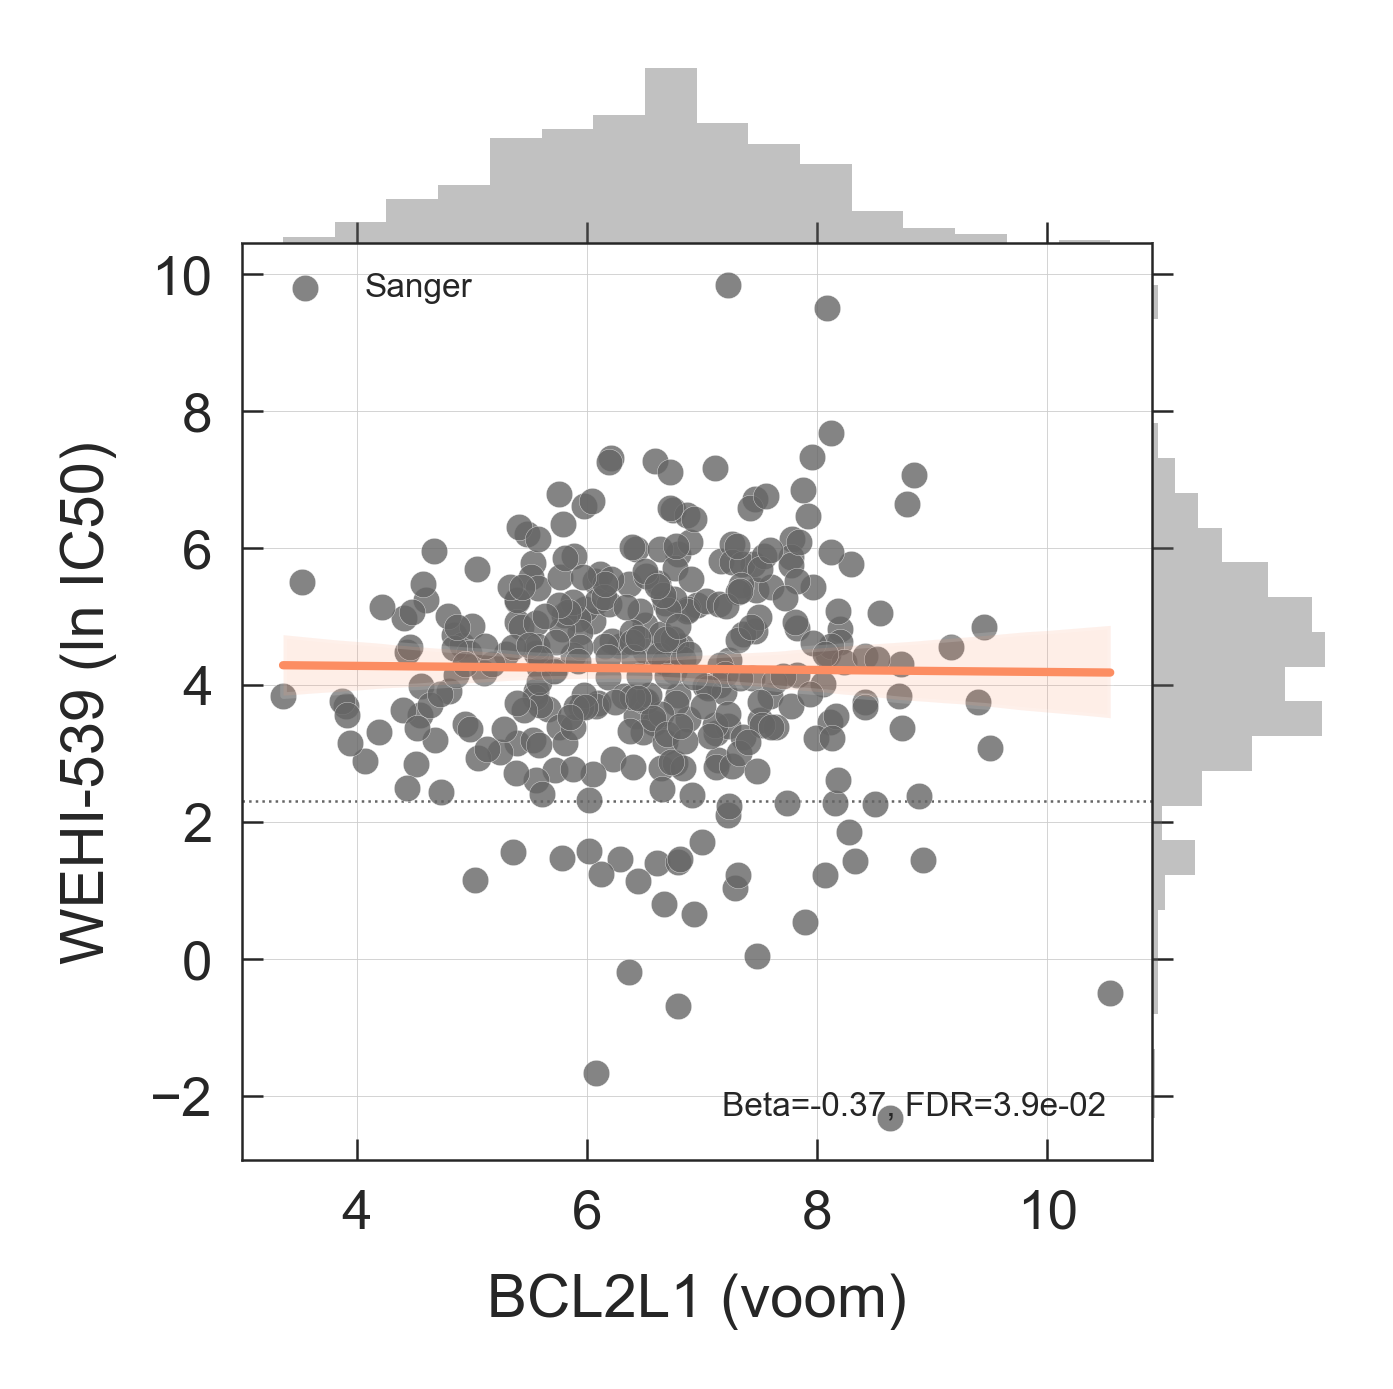

In [31]:
dgs = [
    ("Nutlin-3a (-)", "MDM2"),
    ("Poziotinib", "ERBB2"),
    ("Afatinib", "ERBB2"),
    ("WEHI-539", "BCL2L1"),
]
for dg in dgs:
    pair = assoc.by(assoc.lmm_drug_gexp, drug_name=dg[0], gene_name=dg[1]).iloc[0]

    drug = tuple(pair[assoc.dcols])

    dmax = np.log(assoc.drespo_obj.maxconcentration[drug])
    annot_text = f"Beta={pair['beta']:.2g}, FDR={pair['fdr']:.1e}"

    plot_df = assoc.build_df(drug=[drug], gexp=[dg[1]]).dropna()
    plot_df = plot_df.rename(columns={drug: "drug"})
    plot_df["Institute"] = "Sanger"

    g = target.plot_corrplot(
        f"gexp_{dg[1]}",
        "drug",
        "Institute",
        plot_df,
        annot_text=annot_text,
    )

    g.ax_joint.axhline(
        y=dmax, linewidth=0.3, color=target.PAL_DTRACE[2], ls=":", zorder=0
    )

    g.set_axis_labels(f"{dg[1]} (voom)", f"{dg[0]} (ln IC50)")

    plt.gcf().set_size_inches(2, 2)
    plt.savefig(
        f"{rpath}/association_drug_gexp_scatter_{dg[0]}_{dg[1]}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

CRISPR correlation profiles

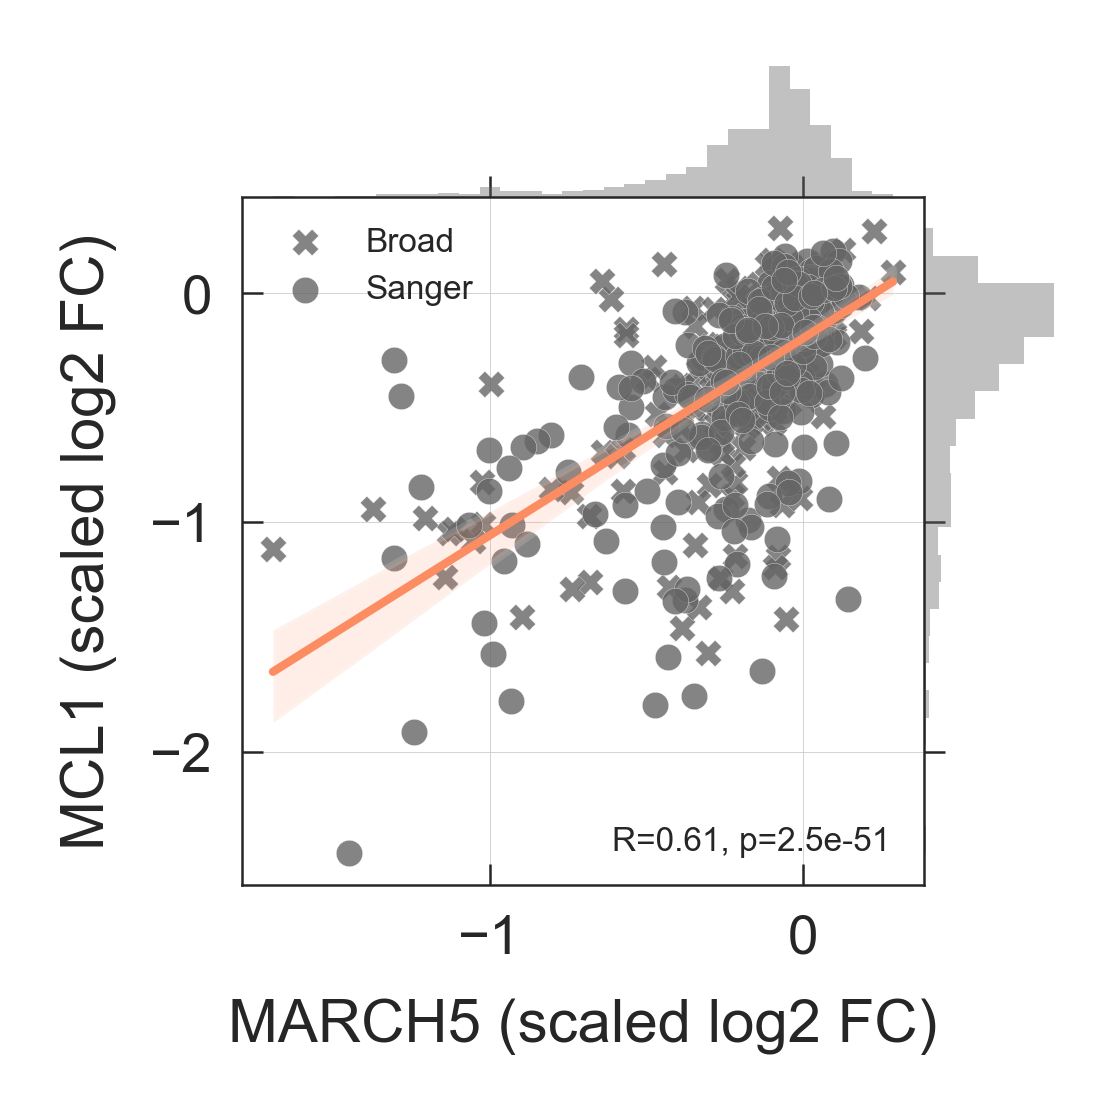

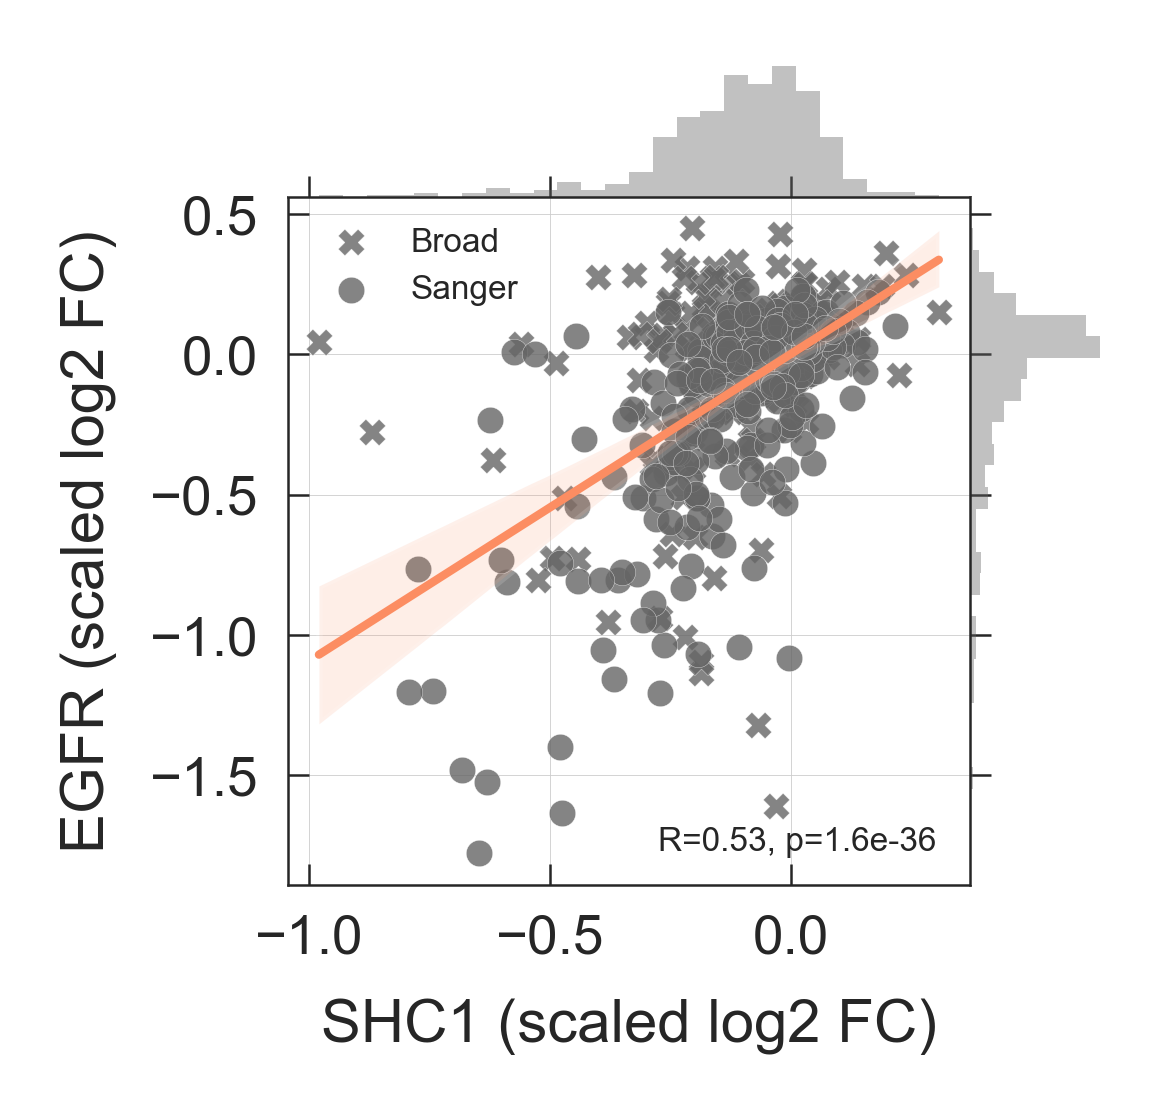

In [32]:
for gene_x, gene_y in [("MARCH5", "MCL1"), ("SHC1", "EGFR")]:
    plot_df = assoc.build_df(crispr=[gene_x, gene_y], sinfo=["institute"]).dropna()

    g = target.plot_corrplot(
        f"crispr_{gene_x}", f"crispr_{gene_y}", "institute", plot_df, annot_text="",
    )

    g.set_axis_labels(f"{gene_x} (scaled log2 FC)", f"{gene_y} (scaled log2 FC)")

    plt.gcf().set_size_inches(1.5, 1.5)
    plt.savefig(
        f"{rpath}/association_scatter_{gene_x}_{gene_y}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

PPI weighted network

In [33]:
ppi_examples = [
    ("Nutlin-3a (-)", 0.4, 1, ["RPL37", "UBE3B"]),
    ("AZD3759", 0.3, 1, None),
    ("Cetuximab", 0.3, 1, None),
]
for d, t, o, e in ppi_examples:
    graph = assoc.ppi.plot_ppi(
        d,
        assoc.lmm_drug_crispr,
        assoc.ppi_string_corr,
        corr_thres=t,
        norder=o,
        fdr=0.05,
        exclude_nodes=e,
    )
    graph.write_pdf(f"{rpath}/association_ppi_{d}.pdf")

Drug-target CRISPR variability between drug significant association

In [34]:
plot_df = assoc.lmm_drug_crispr.query("target == 'T'")
plot_df["crispr_std"] = assoc.crispr.loc[plot_df["GeneSymbol"]].std(1).values
plot_df["drug_std"] = (
    assoc.drespo.loc[[tuple(v) for v in plot_df[target.dinfo].values]].std(1).values
)
plot_df["signif"] = plot_df["fdr"].apply(lambda v: "Yes" if v < target.fdr else "No")

/Users/eg14/miniconda3/envs/crispy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/eg14/miniconda3/envs/crispy/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/eg14/miniconda3/envs/crispy/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [35]:
pal = {"No": target.PAL_DTRACE[1], "Yes": target.PAL_DTRACE[2]}

/Users/eg14/miniconda3/envs/crispy/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


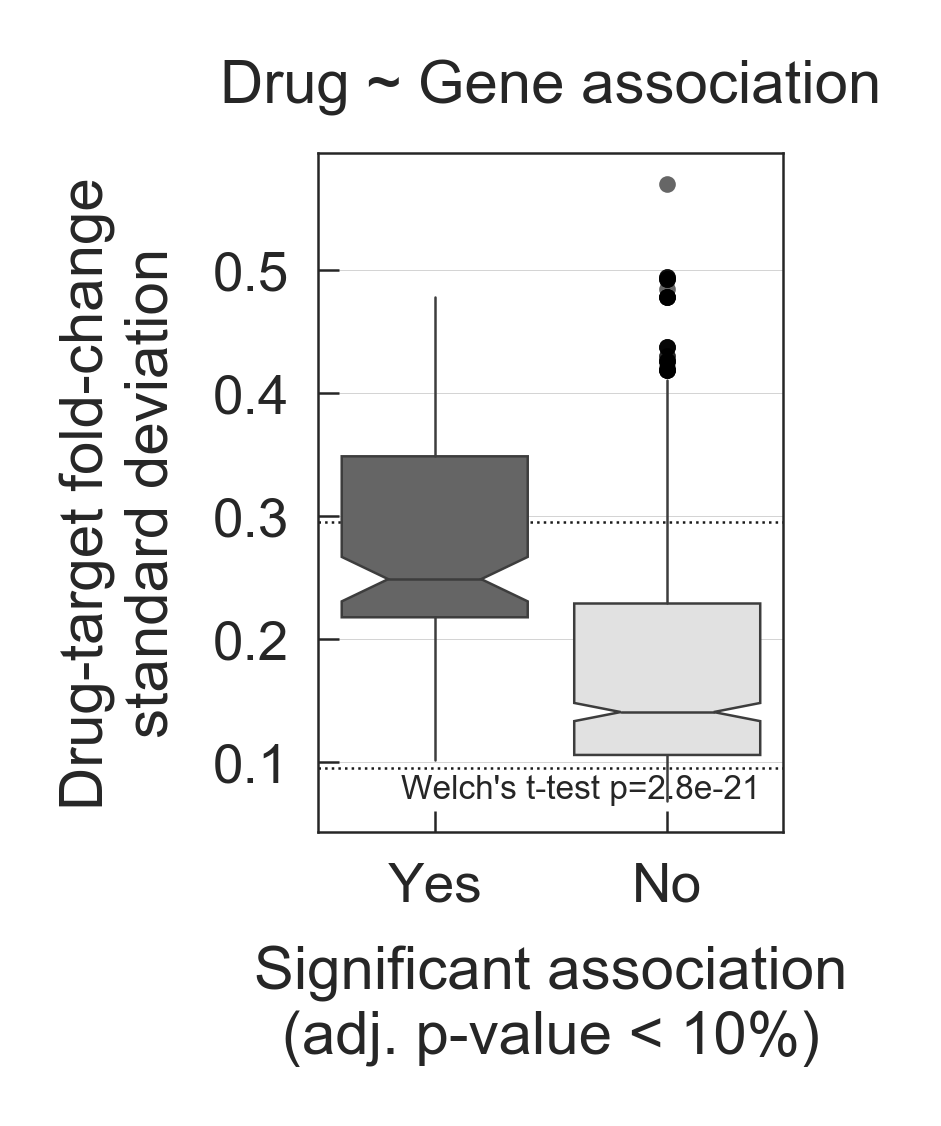

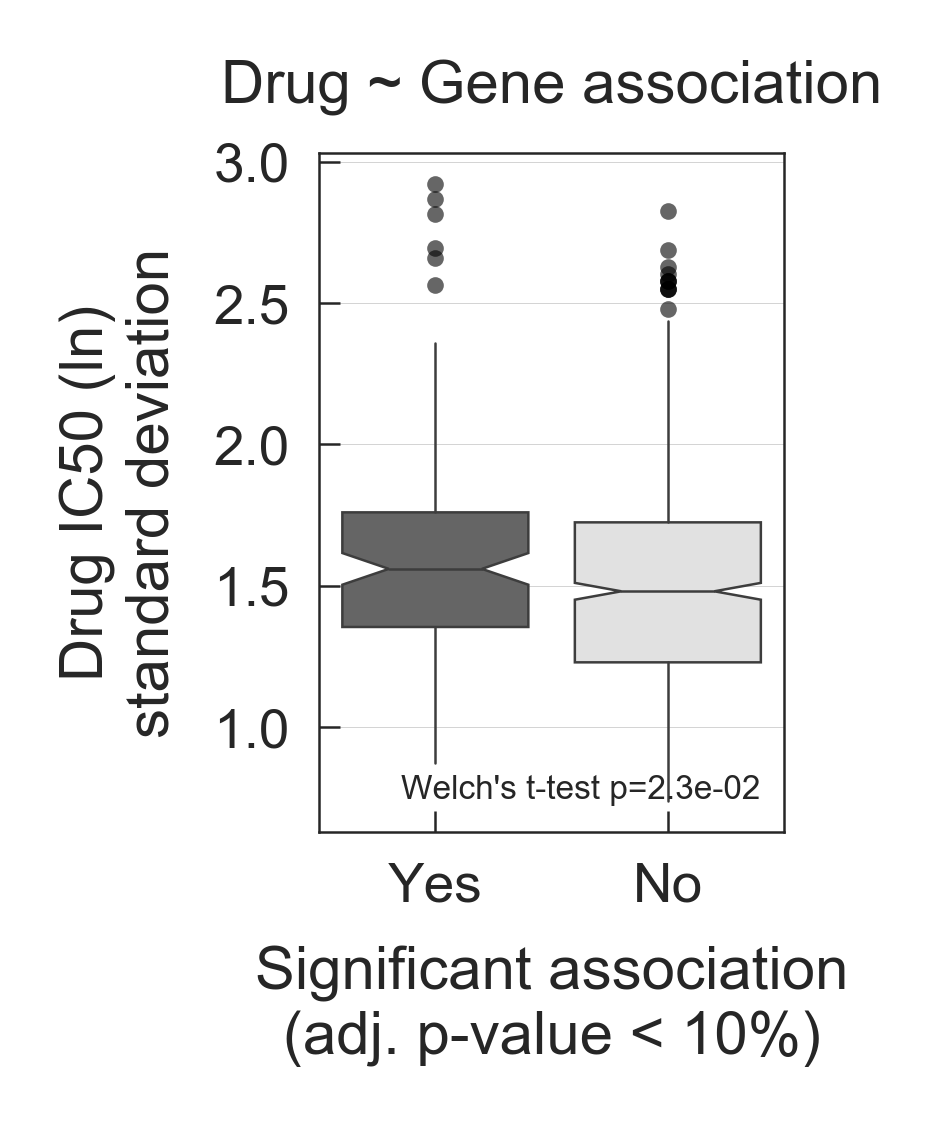

In [36]:
for dtype in ["crispr_std", "drug_std"]:
    plt.figure(figsize=(1.0, 1.5), dpi=600)

    ax = sns.boxplot(
        "signif",
        dtype,
        data=plot_df,
        palette=pal,
        linewidth=0.3,
        fliersize=1.5,
        flierprops=target.FLIERPROPS,
        showcaps=False,
        notch=True,
    )

    t, p = ttest_ind(
        plot_df.query(f"signif == 'Yes'")[dtype],
        plot_df.query(f"signif == 'No'")[dtype],
        equal_var=False,
    )

    ax.text(
        0.95,
        0.05,
        f"Welch's t-test p={p:.1e}",
        fontsize=4,
        transform=ax.transAxes,
        ha="right",
    )

    ax.grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="y")

    if dtype == "crispr_std":
        ness_std = assoc.crispr.loc[Utils.get_non_essential_genes()].std(1).median()
        plt.axhline(ness_std, ls=":", lw=0.3, c="k", zorder=0)

        ess_std = assoc.crispr.loc[Utils.get_essential_genes()].std(1).median()
        plt.axhline(ess_std, ls=":", lw=0.3, c="k", zorder=0)

    plt.title("Drug ~ Gene association")
    plt.xlabel("Significant association\n(adj. p-value < 10%)")
    plt.ylabel(
        "Drug-target fold-change\nstandard deviation"
        if dtype == "crispr_std"
        else "Drug IC50 (ln)\nstandard deviation"
    )

    plt.savefig(
        f"{rpath}/target_benchmark_drug_signif_{dtype}_boxplot.pdf", bbox_inches="tight"
    )
    plt.show()

Copyright (C) 2019 Emanuel Goncalves